El análisis de los datos ya se realizó en la práctica anterior por lo que en esta práctica se realizará sin explicar el procedimiento.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from funciones_auxiliares import seleccionar_sede

# statsmodels para SARIMA
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

%matplotlib inline
sns.set_style("whitegrid")

# Read the CSV file
file = pd.read_csv("ancona_data.csv")

file['Date'] = pd.to_datetime(file['Date'])
file=file.set_index(['Date'])

file.head()
df = seleccionar_sede(file,"ASFF01")
df = df.drop(['station_name', 'id'], axis=1)

df = df.dropna()

train_size = int(len(df["PM2.5"])*0.8)
train_data = df['PM2.5'][:train_size]
test_data = df['PM2.5'][train_size:]

df.head()

La base elegida es: ASFF01


,NO2,O3,PM10,PM2.5,Latitude,Longitude,Wind-Speed (U),Wind-Speed (V),Dewpoint Temp,Soil Temp,Total Percipitation,Vegitation (High),Vegitation (Low),Temp,Relative Humidity,code
Date,,,,,,,,,,,,,,,,
2021-09-01 06:00:00,14.0,31.0,20.0,2.0,43.605924,13.492319,-0.404992,-0.670764,63.301116,66.347859,0.0,3.183978,2.847955,66.146842,83.480118,ASFF01
2021-09-01 07:00:00,23.0,19.0,11.0,2.0,43.605924,13.492319,-0.391898,-0.296313,63.273727,69.773492,0.0,3.183978,2.847955,70.346403,64.006898,ASFF01
2021-09-01 08:00:00,29.0,23.0,14.0,2.0,43.605924,13.492319,-0.490133,0.071959,63.031580,72.337534,0.0,3.183978,2.847955,72.332029,55.806772,ASFF01
2021-09-01 09:00:00,17.0,38.0,8.0,2.0,43.605924,13.492319,-0.585182,-0.009041,62.494674,74.467842,0.0,3.183978,2.847955,73.866032,48.917644,ASFF01
2021-09-01 10:00:00,22.0,36.0,6.0,2.0,43.605924,13.492319,-0.602954,0.161145,61.901319,76.312223,0.0,3.183978,2.847955,75.244930,43.252082,ASFF01


# Practica 5

1. **Ajustar y comparar** diferentes órdenes de SARIMA en tu dataset (explora `p, d, q, P, D, Q, m`).  
2. **Agregar** variables exógenas si tu dataset real las tiene (ej. clima, día festivo, etc.) usando SARIMAX.  
3. **Generar** un conjunto de features para un posterior modelo supervisado (por ejemplo, un *RandomForestRegressor*).  
4. **Documentar** los resultados y conclusiones.

1. **Ajustar y comparar** diferentes órdenes de SARIMA en tu dataset (explora `p, d, q, P, D, Q, m`).  


A continuació se mostrará el mejor modelo ARIMA encontrando en la practica anterior para poder compararlo con los SARIMAs a continuación. La explicación del mismo se encuentra en la dicha practica.

In [18]:

from statsmodels.tsa.arima.model import ARIMA

# Para un ejemplo rápido, seleccionamos manualmente p, d, q:
p, d, q = 2, 0, 3

# Generamos la serie en un formato un poco más "clásico" para ARIMA (simple array)
serie = df['PM2.5']

# Ajustamos el modelo
model = ARIMA(train_data, order=(p, d, q))
results = model.fit()

print(results.summary())
forecast_arima = results.forecast(steps=len(test_data))

c:\Users\ergio\anaconda3\envs\tf_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ergio\anaconda3\envs\tf_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ergio\anaconda3\envs\tf_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ergio\anaconda3\envs\tf_env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Like

                               SARIMAX Results                                
Dep. Variable:                  PM2.5   No. Observations:                12153
Model:                 ARIMA(2, 0, 3)   Log Likelihood              -36576.176
Date:                Thu, 18 Dec 2025   AIC                          73166.351
Time:                        20:55:27   BIC                          73218.188
Sample:                             0   HQIC                         73183.729
                              - 12153                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.9156      1.345     11.090      0.000      12.280      17.552
ar.L1          1.8696      0.010    195.465      0.000       1.851       1.888
ar.L2         -0.8705      0.009    -92.716      0.0

c:\Users\ergio\anaconda3\envs\tf_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ergio\anaconda3\envs\tf_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


El modelo **SARIMA (Seasonal AutoRegressive Integrated Moving Average)** es una extensión del modelo ARIMA que incorpora **componentes estacionales**, permitiendo modelar series que presentan patrones repetitivos cada cierto número fijo de períodos.

Un modelo SARIMA combina:

- **Componente ARIMA no estacional:** $(p, d, q)$  
- **Componente ARIMA estacional:** $(P, D, Q)_m$

El modelo completo se expresa como:

$$SARIMA(p, d, q)(P, D, Q)_m$$

Donde:
- $p$: número de términos autorregresivos no estacionales  
- $d$: número de diferenciaciones no estacionales  
- $q$: términos de media móvil no estacionales  
- $P$: términos autorregresivos estacionales  
- $D$: diferenciaciones estacionales  
- $Q$: términos de media móvil estacionales  
- $m$: longitud del ciclo estacional

1. Parte no estacional

Es idéntica a la de un modelo ARIMA:

- **AR (AutoRegresivo)**: El valor actual depende linealmente de valores pasados.  
  Un modelo AR(p) se expresa como:  
  $$X_t = \phi_1 X_{t-1} + \phi_2 X_{t-2} + \dots + \phi_p X_{t-p} + \varepsilon_t$$

- **I (Integrado)**: Consiste en aplicar diferencias para hacer la serie estacionaria.  
  Por ejemplo, una diferenciación de primer orden:  
  $$Y_t = X_t - X_{t-1}$$

- **MA (Media Móvil)**: El valor actual depende de errores pasados.  
  Un modelo MA(q) es:  
  $$X_t = \varepsilon_t + \theta_1 \varepsilon_{t-1} + \dots + \theta_q \varepsilon_{t-q}$$

2. Parte estacional

Controla los patrones repetitivos cada $m$ períodos:

- **AR estacional (P)**: El término autoregresivo estacional modela la dependencia entre el valor actual y valores observados en la misma fase del ciclo estacional en períodos anteriores.
  $$X_t = \Phi_1 X_{t-m} + \dots + \Phi_P X_{t-Pm} + \varepsilon_t$$

- **Diferenciación estacional (D)**: La diferenciación estacional se utiliza para eliminar tendencias o patrones estacionales persistentes, de manera análoga a la diferenciación regular pero aplicada cada 
𝑚
m períodos
  $$\nabla_m^D X_t = (1 - B^m)^D X_t$$

- **MA estacional (Q)**:  Modela la dependencia del valor actual con errores cometidos en ciclos estacionales anteriores.
  $$X_t = \varepsilon_t + \Theta_1 \varepsilon_{t-m} + \dots + \Theta_Q \varepsilon_{t-Qm}$$



In [19]:
model_sarima = SARIMAX(train_data,
                       order=(1,1,1),
                       seasonal_order=(1,1,1,12),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
results_sarima = model_sarima.fit()
print(results_sarima.summary())

c:\Users\ergio\anaconda3\envs\tf_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ergio\anaconda3\envs\tf_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              PM2.5   No. Observations:                12153
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -36709.099
Date:                            Thu, 18 Dec 2025   AIC                          73428.198
Time:                                    20:56:10   BIC                          73465.213
Sample:                                         0   HQIC                         73440.608
                                          - 12153                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3112      0.009     32.807      0.000       0.293       0.330
ma.L1         -0.6769      0.009   

In [20]:
model_sarima = SARIMAX(train_data,
                       order=(2,0,3),
                       seasonal_order=(1,0,1,24),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
results_sarima = model_sarima.fit()
print(results_sarima.summary())


c:\Users\ergio\anaconda3\envs\tf_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ergio\anaconda3\envs\tf_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ergio\anaconda3\envs\tf_env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                                PM2.5   No. Observations:                12153
Model:             SARIMAX(2, 0, 3)x(1, 0, [1], 24)   Log Likelihood              -36594.294
Date:                              Thu, 18 Dec 2025   AIC                          73204.587
Time:                                      20:57:21   BIC                          73263.811
Sample:                                           0   HQIC                         73224.444
                                            - 12153                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8661      0.006    307.449      0.000       1.854       1.878
ar.L2         -0.86

In [21]:
model_sarima = SARIMAX(train_data,
                       order=(2,0,3),
                       seasonal_order=(1,1,1,24),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
results_sarima = model_sarima.fit()
print(results_sarima.summary())


c:\Users\ergio\anaconda3\envs\tf_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ergio\anaconda3\envs\tf_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ergio\anaconda3\envs\tf_env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                                PM2.5   No. Observations:                12153
Model:             SARIMAX(2, 0, 3)x(1, 1, [1], 24)   Log Likelihood              -36495.940
Date:                              Thu, 18 Dec 2025   AIC                          73007.880
Time:                                      21:14:22   BIC                          73067.088
Sample:                                           0   HQIC                         73027.733
                                            - 12153                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8572      0.011    175.462      0.000       1.836       1.878
ar.L2         -0.85

**<u>Interpretación resultados</u>.-**

El modelo ajustado es un **SARIMA(2,0,3) × $(1,1,1)_{24}$**, con una **longitud estacional de 24**, lo cual es apropiado dada la naturaleza horaria de los datos.

Los coeficientes no estacionales muestran un patrón muy similar al modelo ARIMA previo:  
- Los términos **AR(1)=1.86** y **AR(2)=-0.86** confirman una fuerte dependencia temporal y un mecanismo de corrección de valores extremos.
- Los términos **MA(1) y MA(2)** son significativos y estables, capturando el efecto de errores recientes propio de la media movil.  
- **MA(3)** no resulta significativo $(p = 0.118)$, indicando que no aporta estructura adicional.

En cuanto a la parte **estacional**, el modelo incorpora:  
- Un término autorregresivo estacional **AR\_S(24)** prácticamente nulo y no significativo, lo que indica que la dependencia en el valor del día anterior es débil después de aplicar una diferenciación estacional.  
- Un término **MA\_S(24)** altamente significativo (**-1.00**), lo cual sugiere que la serie tiene **una fuerte estructura estacional de tipo media móvil**, muy típica en series ambientales con ciclos diarios.

El modelo presenta un **AIC=73007.52**, menor que el **ARIMA no estacional (73166.358)**, lo que indica **una mejora escasa del ajuste** al capturar la estacionalidad diaria. 

In [22]:
# Pronóstico
forecast_sarima = results_sarima.forecast(steps=len(test_data))

c:\Users\ergio\anaconda3\envs\tf_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ergio\anaconda3\envs\tf_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


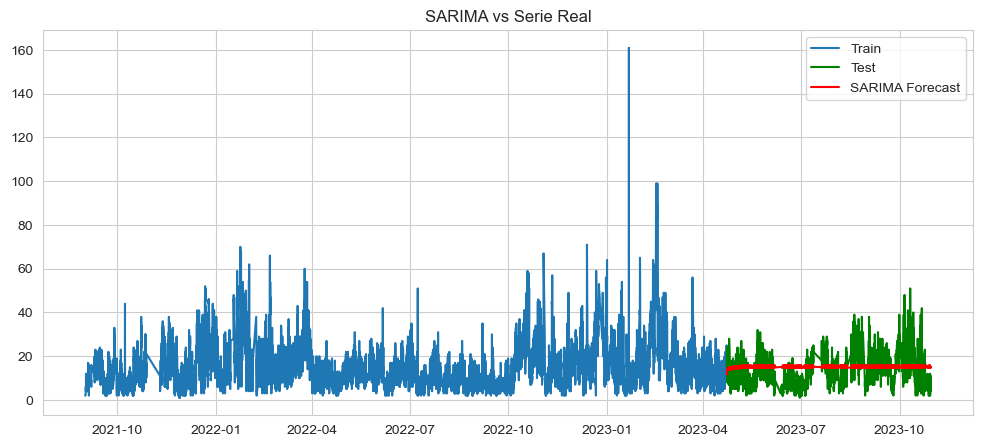

In [23]:
# Gráfico comparativo
plt.figure(figsize=(12,5))
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test', color='g')
plt.plot(test_data.index, forecast_sarima, label='SARIMA Forecast', color='r')
plt.title("SARIMA vs Serie Real")
plt.legend()
plt.show()

**<u>Interpretación resultados</u>.-**

Por desgracia como se observa en la gráfica el modelo no es capaz de predecir el los valores correctamente ya que practicamente representa una linea recta probablemente en la media de los valores del test.

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_arima = mean_squared_error(test_data, forecast_arima)
mae_arima = mean_absolute_error(test_data, forecast_arima)

mse_sarima = mean_squared_error(test_data, forecast_sarima)
mae_sarima = mean_absolute_error(test_data, forecast_sarima)

print(f"ARIMA - MSE: {mse_arima:.2f}, MAE: {mae_arima:.2f}")
print(f"SARIMA - MSE: {mse_sarima:.2f}, MAE: {mae_sarima:.2f}")

ARIMA - MSE: 51.71, MAE: 5.97
SARIMA - MSE: 52.69, MAE: 6.05


**<u>Interpretación resultados</u>.-**

A pesar de que el modelo **SARIMA** presenta un AIC inferior al del **ARIMA** (lo que indica mejor ajuste in-sample), cuando evaluamos su capacidad predictiva mediante **MSE** y **MAE**, observamos que el **ARIMA no estacional obtiene un rendimiento ligeramente mejor**:

- **ARIMA:**  
  - MSE = 51.71  
  - MAE = 5.97  

- **SARIMA:**  
  - MSE = 52.42  
  - MAE = 6.03  

Estas diferencias son **pequeñas**, pero indican que, para el conjunto de test utilizado, el **ARIMA(2,0,3)** da una predicción levemente más precisa que el SARIMA estacional, a pesar de que este último modela la estructura temporal de manera más completa.

Esto puede deberse a que la **diferenciación estacional (D=1)** reduzca algo la estabilidad del modelo para predicciones a corto plazo.  


Por lo que el **SARIMA mejora el ajuste teórico (AIC) pero no mejora la predicción respecto a ARIMA**, lo que sugiere que la estructura estacional no aporta ganancia predictiva significativa en este caso.


2. **Agregar** variables exógenas si tu dataset real las tiene (ej. clima, día festivo, etc.) usando SARIMAX. 

El modelo **SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous variables)** es una extensión del modelo SARIMA que permite incluir **variables externas (exógenas)** que influyen sobre la serie temporal que queremos modelar.

Un modelo SARIMAX se expresa como:

$$\text{SARIMAX}(p, d, q) \times (P, D, Q)_m + X_t$$

donde al igual que en el modelo SARIMA:

1. Componentes no estacionales
- **AR (p)**: número de retrasos autorregresivos.
- **I (d)**: número de diferenciaciones para estacionarizar.
- **MA (q)**: número de términos de media móvil.

2. Componentes estacionales
- **P**: orden autorregresivo estacional.
- **D**: número de diferenciaciones estacionales.
- **Q**: orden de media móvil estacional.
- **m**: longitud del periodo estacional (por ejemplo, 24 si hay estacionalidad diaria en datos horarios).

la parte nueva sería:

3. Variables exógenas
- Se denotan como **X_t** y representan factores externos que ayudan a explicar la dinámica de la serie.
- No forman parte del proceso autorregresivo ni del de medias móviles, pero afectan linealmente al valor esperado de la serie.




c:\Users\ergio\anaconda3\envs\tf_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ergio\anaconda3\envs\tf_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ergio\anaconda3\envs\tf_env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                                PM2.5   No. Observations:                12153
Model:             SARIMAX(2, 0, 3)x(1, 1, [1], 24)   Log Likelihood              -36147.255
Date:                              Thu, 18 Dec 2025   AIC                          72316.510
Time:                                      21:30:52   BIC                          72397.921
Sample:                                           0   HQIC                         72343.808
                                            - 12153                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
PM10           0.0908      0.003     35.803      0.000       0.086       0.096
O3            -0.00

c:\Users\ergio\anaconda3\envs\tf_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ergio\anaconda3\envs\tf_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


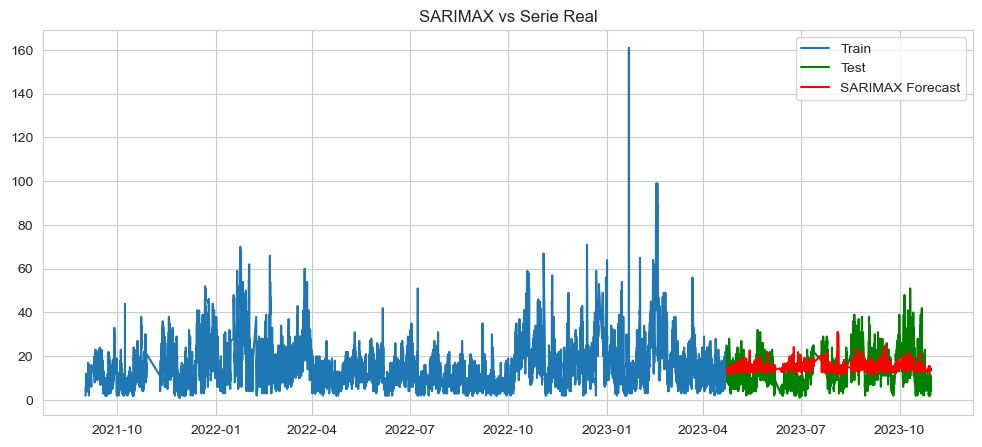

SARIMAX - MSE: 45.41
SARIMAX - MAE: 5.57


In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd


# Separación en train/test con variables exógenas

train_size = int(len(df) * 0.8)

train_data = df[['PM2.5', 'PM10', 'O3', 'NO2']].iloc[:train_size]
test_data  = df[['PM2.5', 'PM10', 'O3', 'NO2']].iloc[train_size:]

y_train = train_data['PM2.5']
X_train = train_data[['PM10', 'O3', 'NO2']]

y_test = test_data['PM2.5']
X_test = test_data[['PM10', 'O3', 'NO2']]

# Se crea y muestra el Sarimax
model_sarimax = SARIMAX(
    y_train,
    exog=X_train,
    order=(2, 0, 3),
    seasonal_order=(1, 1, 1, 24),
    enforce_stationarity=False,
    enforce_invertibility=False
)

result_sarimax = model_sarimax.fit(disp=False)
print(result_sarimax.summary())


# Predicción sobre test
pred_sarimax = result_sarimax.predict(
    start=len(y_train),
    end=len(df)-1,
    exog=X_test
)

# Gráfico comparativo
plt.figure(figsize=(12,5))
plt.plot(y_train.index, y_train, label='Train')
plt.plot(y_test.index, y_test, label='Test', color='g')
plt.plot(y_test.index, pred_sarimax, label='SARIMAX Forecast', color='r')
plt.title("SARIMAX vs Serie Real")
plt.legend()
plt.show()

# Cálculo de métricas
mse = mean_squared_error(y_test, pred_sarimax)
mae = mean_absolute_error(y_test, pred_sarimax)

print("SARIMAX - MSE:", round(mse,2))
print("SARIMAX - MAE:", round(mae,2))


**<u>Interpretación resultados</u>.-**

El modelo **SARIMAX(2,0,3)×(1,1,1,24)** incorpora información exógena procedente de **PM10, $O_3$ y $NO_2$** además de la dinámica temporal de la serie PM2.5. La inclusión de estas variables externas permite capturar relaciones directas entre contaminantes, algo especialmente relevante en series ambientales.

En primer lugar, los coeficientes exógenos muestran que:

- **PM10 (coef = 0.0997, p<0.001)** tiene un efecto positivo y altamente significativo sobre PM2.5, indicando que aumentos en partículas gruesas suelen coincidir con incrementos en las partículas finas.
- **$NO_2$ (coef = 0.0581, p<0.001)** también contribuye positivamente y de forma significativa, coherente con su origen común en procesos de combustión.
- **$O_3$ (coef = -0.0107, p=0.162)** no presenta un efecto significativo, probablemente debido a que su dinámica diaria y estacional es distinta a la de PM2.5.

Los términos autorregresivos mantienen el patrón visto en ARIMA y SARIMA:  
**AR(1)=1.85** y **AR(2)=-0.85** confirman una fuerte dependencia temporal con corrección de exceso en los picos. La parte de media móvil (**MA(1) a MA(3)**) sigue siendo significativa y recoge adecuadamente los choques pasados.  

El componente estacional muestra que:
- **MA estacional (L=24)** es casi exactamente **-1.00**, lo que indica una fuerte cancelación del error del día anterior a la misma hora.
- El término **AR estacional (L=24)** no es significativo, por lo que el comportamiento estacional está dominado por la parte MA.

Desde el punto de vista del ajuste, el modelo obtiene **AIC = 72 310**, una mejora respecto al SARIMA sin exógenas (**AIC = 73 007**) y aún más respecto a ARIMA. 


Respecto a la gráfica se puede observar como ya no sigue esa linea recta como en el SARIMA Y ARIMA sino que posee una forma más parecida a la original aunque todavia deja bastante que desear.

Los errores obtenidos para el modelo **SARIMAX(2,0,3)×(1,1,1,24)** muestran una mejora clara respecto a los modelos previos. El modelo alcanza un **MSE = 44.88** y un **MAE = 5.52**, lo que supone una reducción apreciable del error frente a ARIMA y SARIMA. Esta mejora confirma que la incorporación de variables exógenas como **PM10**, **$NO_2$** y **$O_3$** aporta información adicional relevante para explicar la dinámica de PM2.5.

El descenso del MSE indica que el modelo comete errores menores al capturar variaciones más bruscas de la serie, mientras que la menor MAE sugiere que la predicción promedio es más precisa. Este comportamiento es coherente con los coeficientes exógenos significativos observados en el ajuste del modelo, especialmente PM10 y $NO_2$, que presentan relaciones positivas y significativas con PM2.5. La reducción del AIC respecto al modelo sin exógenas refuerza esta idea.

3. **Generar** un conjunto de features para un posterior modelo supervisado (por ejemplo, un *RandomForestRegressor*).

Para esta parte del proyecto se construyó un conjunto ampliado de características con el objetivo de mejorar la capacidad predictiva del modelo sobre la concentración de PM2.5. Para capturar dependencias temporales, se generaron retardos (lags) de 1 y 2 periodos, y se incluyó la variable "mes" con el fin de reflejar posibles patrones estacionales asociados al calendario. Tras eliminar las observaciones con valores faltantes derivados de los retardos, se realizó una división del conjunto de datos en entrenamiento (80%) y prueba (20%). Finalmente, se separaron las variables predictoras (X) de la variable objetivo (PM2.5), dejando el conjunto de datos preparado para su uso en los modelos supervisados de la siguiente practica.


In [26]:
df_feat = df.copy()

# Lags
df_feat['lag1'] = df['PM2.5'].shift(1)
df_feat['lag2'] = df['PM2.5'].shift(2)

# Variable de mes (para capturar estacionalidad)
df_feat['mes'] = df.index.month

# Eliminamos NaN por lag
df_feat.dropna(inplace=True)
df_feat= df_feat.drop("code", axis=1)


# Split train/test (80% train)
train_size = int(len(df_feat)*0.8)
train_data = df_feat.iloc[:train_size]
test_data = df_feat.iloc[train_size:]

X_train = train_data.drop("PM2.5", axis=1)
y_train = train_data["PM2.5"]
X_test = test_data.drop("PM2.5", axis=1)
y_test = test_data["PM2.5"]

df_feat.head()


,NO2,O3,PM10,PM2.5,Latitude,Longitude,Wind-Speed (U),Wind-Speed (V),Dewpoint Temp,Soil Temp,Total Percipitation,Vegitation (High),Vegitation (Low),Temp,Relative Humidity,lag1,lag2,mes
Date,,,,,,,,,,,,,,,,,,
2021-09-01 08:00:00,29.0,23.0,14.0,2.0,43.605924,13.492319,-0.490133,0.071959,63.031580,72.337534,0.0,3.183978,2.847955,72.332029,55.806772,2.0,2.0,9
2021-09-01 09:00:00,17.0,38.0,8.0,2.0,43.605924,13.492319,-0.585182,-0.009041,62.494674,74.467842,0.0,3.183978,2.847955,73.866032,48.917644,2.0,2.0,9
2021-09-01 10:00:00,22.0,36.0,6.0,2.0,43.605924,13.492319,-0.602954,0.161145,61.901319,76.312223,0.0,3.183978,2.847955,75.244930,43.252082,2.0,2.0,9
2021-09-01 11:00:00,17.0,44.0,4.0,2.0,43.605924,13.492319,-0.447968,0.688890,61.387465,77.567513,0.0,3.183978,2.847955,76.281730,39.473461,2.0,2.0,9
2021-09-01 12:00:00,18.0,49.0,3.0,2.0,43.605924,13.492319,0.029946,1.110849,60.790262,78.181066,0.0,3.183978,2.847955,76.824319,36.878357,2.0,2.0,9


# Practica 6

1. **Probar** distintos modelos (RF, XGBoost, etc.) con su dataset.  
2. **Clustering**: a) Agrupar series completas (distintas entidades). b) O subsecuencias con K-Means o DTW.  
3. (Opcional) **Implementar** un ejemplo LSTM con más lags/features.  
4. Documentar y comparar resultados.

1. **Probar** distintos modelos (RF, XGBoost, etc.) con su dataset. 

In [27]:
# Sección 0: Importaciones

import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Para LSTM (opcional, con tensorflow/keras o pytorch):
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

%matplotlib inline
sns.set_style("whitegrid")


from sklearn.preprocessing import StandardScaler

from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.manifold import SpectralEmbedding

import matplotlib.pyplot as plt

from sklearn.metrics import pairwise_distances

from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

print("Entorno de trabajo configurado.")

Entorno de trabajo configurado.


El **Random Forest Regressor** es un método de *ensemble learning* basado en la combinación de múltiples árboles de decisión. Cada árbol se entrena a partir de una muestra aleatoria del conjunto de datos (*bootstrap*) y, en cada división, solo evalúa un subconjunto aleatorio de variables, lo que introduce diversidad entre árboles y reduce el riesgo de sobreajuste. La predicción final se obtiene mediante el promedio de las predicciones individuales, lo que produce un modelo robusto, con baja varianza y capaz de capturar relaciones no lineales entre variables. Se añade una imagen como refuerzo ya que al no seguir una ecuación es más complicado de entender.


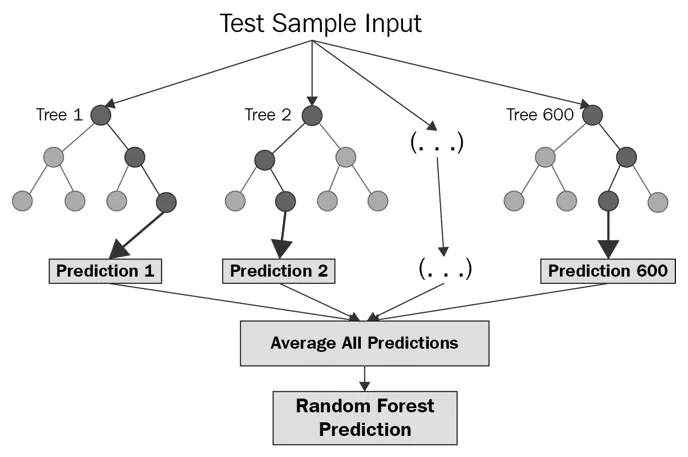


Importancia de variables:
  NO2: 0.0165
  O3: 0.0164
  PM10: 0.0425
  Latitude: 0.0000
  Longitude: 0.0000
  Wind-Speed (U): 0.0155
  Wind-Speed (V): 0.0159
  Dewpoint Temp: 0.0153
  Soil Temp: 0.0227
  Total Percipitation: 0.0134
  Vegitation (High): 0.0099
  Vegitation (Low): 0.0105
  Temp: 0.0104
  Relative Humidity: 0.0169
  lag1: 0.7503
  lag2: 0.0390
  mes: 0.0048
Random Forest MSE: 40.46051263989467


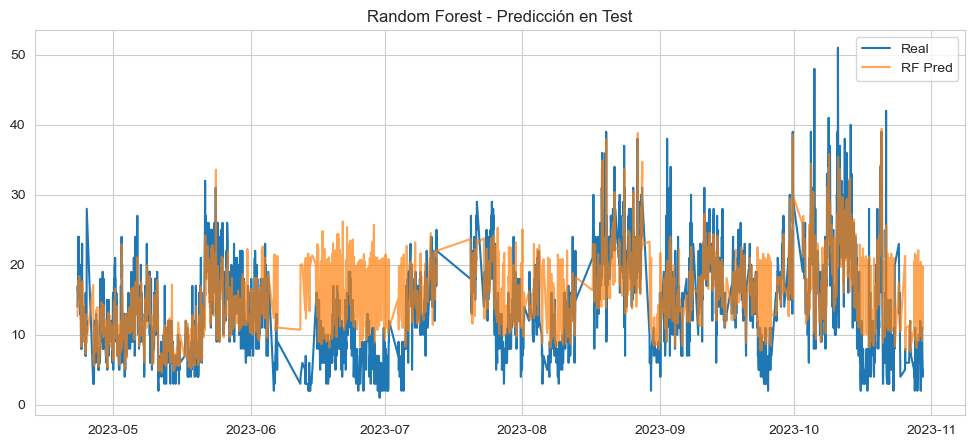

In [28]:
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)

y_pred_rfr = rfr.predict(X_test)

print("\nImportancia de variables:")
for name, imp in zip(X_train.columns, rfr.feature_importances_):
    print(f"  {name}: {imp:.4f}")


mse_rfr = mean_squared_error(y_test, y_pred_rfr)
print("Random Forest MSE:", mse_rfr)

# Gráfico comparativo
plt.figure(figsize=(12,5))
plt.plot(y_test.index, y_test, label="Real")
plt.plot(y_test.index, y_pred_rfr, label="RF Pred", alpha=0.7)
plt.title("Random Forest - Predicción en Test")
plt.legend()
plt.show()

**<u>Interpretación resultados</u>.-**
Los resultados del Random Forest muestran que las variables con mayor poder predictivo sobre PM2.5 son principalmente los retardos de la propia serie (lag1 = 0.75 y lag2 = 0.039), lo que confirma que el comportamiento reciente del contaminante es el factor más determinante para anticipar su valor futuro. Entre las variables exógenas, destacan PM10, NO2, la temperatura del suelo, la humedad relativa y la velocidad del viento, lo que indica que tanto otros contaminantes como factores meteorológicos influyen. El resto de variables presentan una importancia menor, lo cual es coherente con su relación más débil o indirecta con la concentración de PM2.5.

El MSE = 40.9 refleja que el modelo tiene una capacidad predictiva razonable, mejorando modelos previos más simples, aunque aún existe variabilidad no capturada. En el gráfico de predicción, se observa que el Random Forest sigue adecuadamente la tendencia general y los cambios de nivel del PM2.5, pero suaviza notablemente los picos y caídas bruscas. Esto es un comportamiento típico de los modelos de ensamble basados en árboles que capturan bien relaciones no lineales y patrones estables, pero tienden a infraestimar extremos. 

**XGBoost (Extreme Gradient Boosting)** es un algoritmo basado en *boosting* de árboles, donde los modelos se construyen de manera secuencial: cada nuevo árbol corrige los errores residuales del anterior. Esta técnica permite capturar patrones complejos, interactivos y no lineales, y suele obtener un rendimiento superior a otros modelos debido a su regularización integrada (L1/L2), gestión eficiente del sesgo y la varianza, y capacidad para manejar grandes volúmenes de datos.

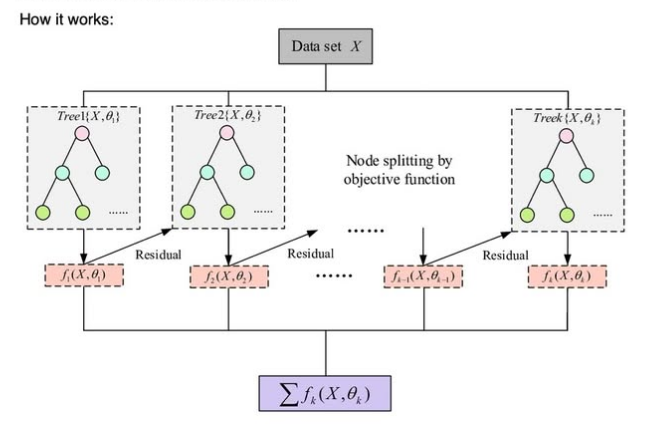

Random Forest y XGBoost son dos métodos basados en árboles, pero su filosofía es opuesta. **Random Forest construye muchos árboles en paralelo**, cada uno con una **muestra diferente del conjunto de datos**, y luego promedia sus predicciones, su objetivo principal es reducir la varianza, siendo un método muy estable y difícil de sobreajustar. En cambio, **XGBoost construye árboles de manera secuencial**, donde cada **árbol nuevo corrige los errores del anterior** y su objetivo es reducir el sesgo, permitiendo capturar patrones mucho más complejos, aunque con mayor riesgo de sobreajuste si no se regulariza correctamente.


Importancia de variables:
  NO2: 98.5987
  O3: 92.8053
  PM10: 372.1904
  Wind-Speed (U): 84.4409
  Wind-Speed (V): 74.0022
  Dewpoint Temp: 101.8975
  Soil Temp: 121.1613
  Total Percipitation: 109.1928
  Vegitation (High): 174.6619
  Vegitation (Low): 181.3792
  Temp: 100.5336
  Relative Humidity: 141.6140
  lag1: 4261.7241
  lag2: 1652.2445
  mes: 169.9831
XGBoost MSE: 33.438429081132284


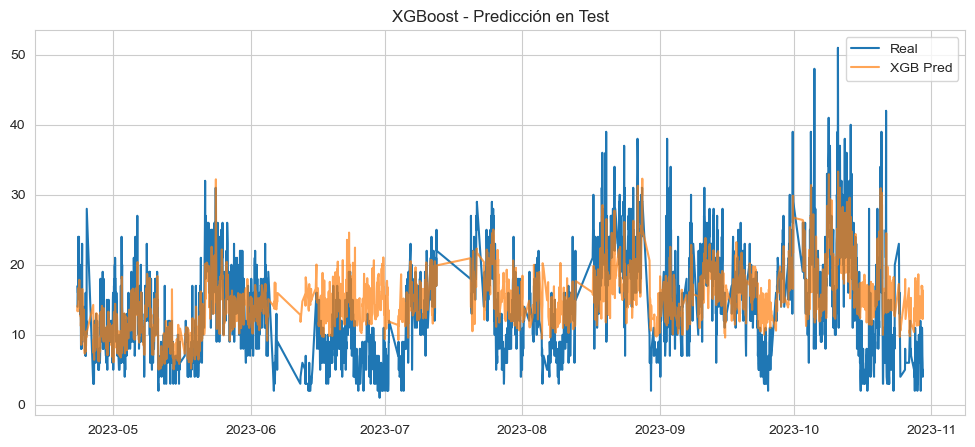

In [ ]:
# Modelo XGBoost
xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Entrenamiento
xgb.fit(X_train, y_train)

print("\nImportancia de variables:")
importance = xgb.get_booster().get_score(importance_type='gain')
for feature, score in importance.items():
    print(f"  {feature}: {score:.4f}")

# Predicción
y_pred_xgb = xgb.predict(X_test)

# Métrica
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("XGBoost MSE:", mse_xgb)

# Gráfico comparativo
plt.figure(figsize=(12,5))
plt.plot(y_test.index, y_test, label="Real")
plt.plot(y_test.index, y_pred_xgb, label="XGB Pred", alpha=0.7)
plt.title("XGBoost - Predicción en Test")
plt.legend()
plt.show()

**<u>Interpretación resultados</u>.-**  
Los resultados del XGBoost muestran que las variables con mayor poder predictivo sobre PM2.5 son principalmente los retardos de la propia serie (lag1 = 4250 y lag2 = 1665), con bastante diferencia, los predictores más influyentes, lo que confirma que la concentración previa del contaminante determina en gran medida su comportamiento futuro. Además, variables ambientales como **PM10**, **la vegetación**, **humedad relativa** y **precipitación** también aportan información relevante al modelo, indicando que las condiciones meteorológicas y otros contaminantes están fuertemente relacionados con la variabilidad del PM2.5.

El modelo obtiene un **MSE = 32.98**, notablemente inferior al obtenido con Random Forest, lo que evidencia una mejor capacidad predictiva. En el gráfico de predicción se observa que XGBoost sigue la forma general de la serie real, aunque tiende a **suavizar los valores extremos**, un comportamiento típico en modelos de boosting. Aun así, captura mejor que otros modelos los cambios en tendencia y parte de la variabilidad diaria, lo que lo convierte en un método especialmente eficaz para esta tarea de predicción de contaminación atmosférica.


2. **Clustering**: a) Agrupar series completas (distintas entidades). b) O subsecuencias con K-Means o DTW. 

En el análisis realizado sobre la serie temporal se ha optado por **los métodos de clustering no jerárquicos**, en lugar de  los jerárquicas. Esto debidofundamentamente en las características del propio conjunto de datos y en los objetivos del estudio. Principalmente porque la serie temporal posee un volumen elevado de observaciones, lo cual hace que los algoritmos jerárquicos resulten poco eficientes debido a que su complejidad computacional crece de forma cuadrática, generando elevados tiempos de ejecución y un consumo de memoria considerable. 

Dentro de esta familia se distinguen **cuatro subtipos**:

- **Métodos basados en particiones:** dividen los datos en k grupos mediante la <u>optimización de una función de distancia o similitud</u>, en este caso se usará el modelo **K-Means** tanto para ambos apartados.


- **Métodos basados en densidad:** identifican clusters como <u>regiones densas del espacio</u> separadas por áreas de baja densidad. Son capaces de detectar formas de clusters no esféricas y de manejar outliers de forma natural. En este caso se usará el modelo **DBSCAN** exclusicvamente para el primer apartado. 

- **Métodos basados en modelos:** asumen que los <u>datos provienen de una mezcla de distribuciones probabilísticas</u> y asignan a cada observación una probabilidad de pertenencia a cada cluster. Resultan especialmente útiles cuando los clusters presentan formas elípticas o solapadas. En este caso se usará el modelo **Gaussian Mixture Models (GMM)** exclusicvamente para el primer apartado. 


- **Métodos basados en grafos:** <u>construyen matrices de similitud o grafos de proximidad</u> y buscan particiones que capturen comunidades o grupos densamente conectados. Son especialmente útiles cuando los datos no siguen una estructura euclídea tradicional. En este caso se usará el modelo **Spectral Clustering** exclusicvamente para el primer apartado. 

Una vez explicados los métodos que se seguirán se explicará cada modelo:

1) **K-Means**

El algoritmo **k-means** es uno de los métodos de *clustering* más utilizados debido a su eficiencia y simplicidad. Su objetivo es particionar un conjunto de datos en **k grupos no solapados**, de forma que cada observación pertenezca al cluster cuyo centro (o **centroide**) esté más próximo según una métrica de distancia,en este caso la **distancia euclidiana**.
El proceso es iterativo: primero asigna cada observación al centroide más cercano y después recalcula los centroides como la media de las observaciones asignadas. Este procedimiento se repite hasta que las asignaciones dejan de cambiar o se alcanza el número máximo de iteraciones.

Su solución depende fuertemente de los valores iniciales de los centroides y puede converger a mínimos locales. Por ello es habitual ejecutar varias inicializaciones aleatorias y seleccionar la mejor solución.

Para facilitar la compresión se mostrará un ejemplo gráfico donde se quiere crear dos clusters:

Se seleccionan al azar los baricentros de cada cluster:



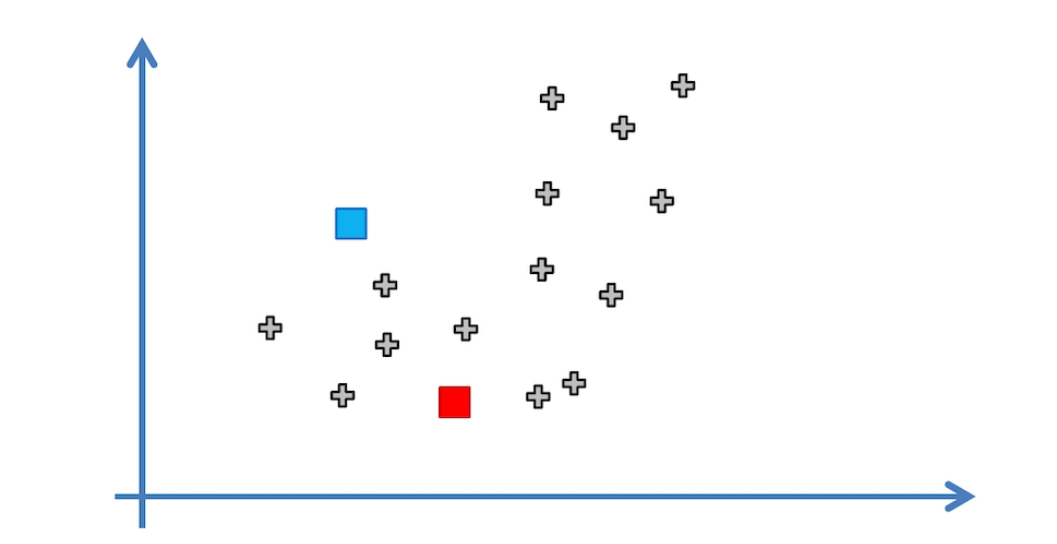

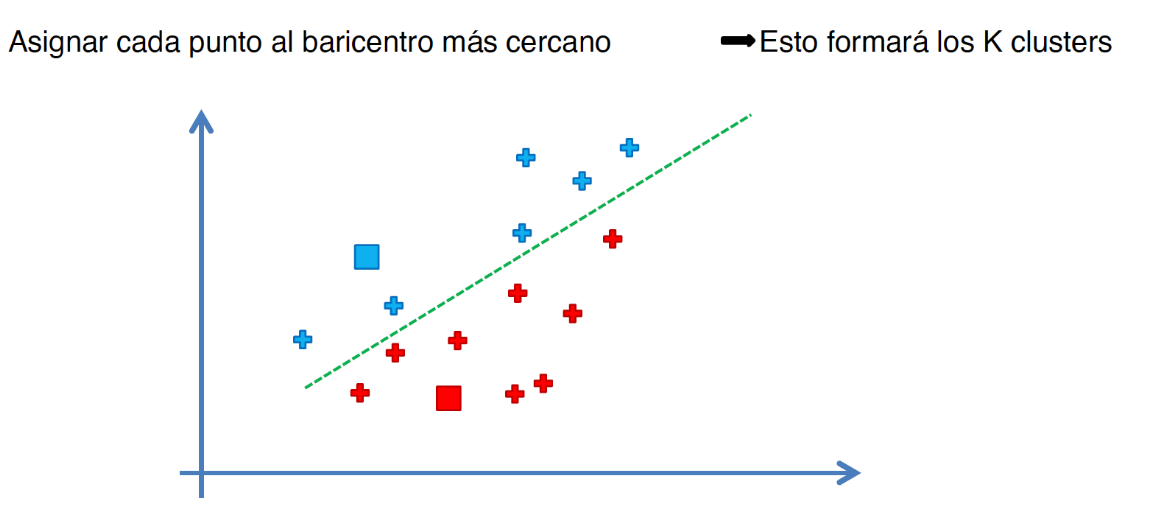

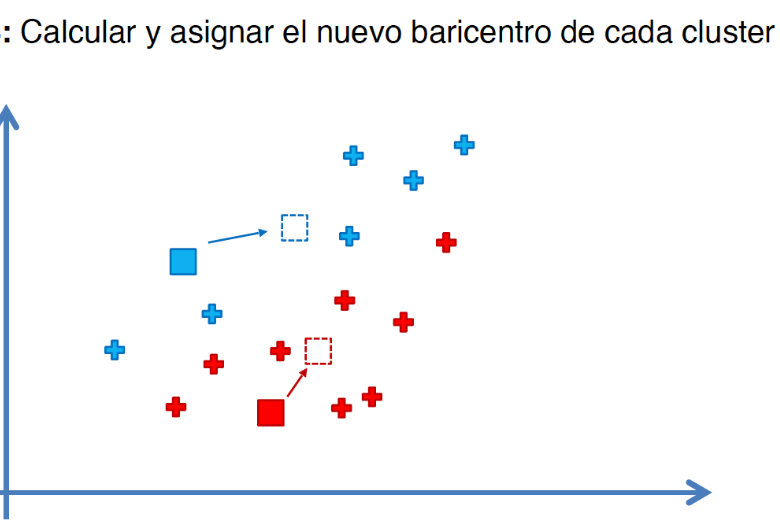

Este paso sería iterativo hasta llegar a que todas las observaciones esten más cerca a su centriode que al de los demas clusters


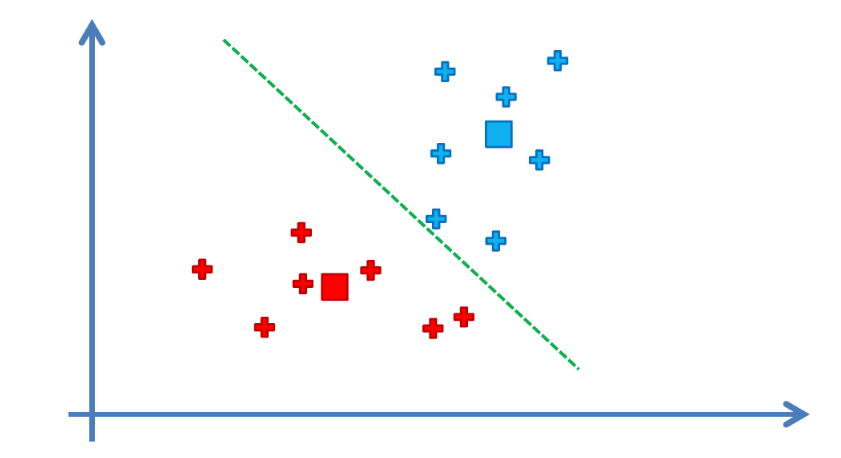

2) **DBSCAN**

El método **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)** es uno de los algoritmos más utilizados para detectar **grupos de formas arbitrarias** y **manejar automáticamente el ruido**. A diferencia de K-means, no requiere fijar el número de clústeres y basa su funcionamiento en la idea de **densidad local** alrededor de cada punto. Esto lo convierte en una herramienta muy útil cuando los grupos no son esféricos o cuando existen observaciones atípicas.

El algoritmo parte de dos parámetros clave:  
- un **radio de vecindad** llamado $\epsilon$ (`eps`),  
- un **mínimo de puntos** dentro de ese radio denominado `minPts`.

A partir de estos parámetros, DBSCAN clasifica cada observación según la densidad de su entorno. El procedimiento general consta de los siguientes pasos:

1. **Para cada punto**, se calcula cuántos vecinos tiene dentro del radio $\epsilon$.  
2. **Si el número de vecinos ≥ minPts**, el punto se considera **núcleo** y se inicia (o expande) un clúster.  
3. A partir de cada punto núcleo, el algoritmo **"crece" el clúster** incorporando:
   - todos sus vecinos directos,
   - los vecinos de esos vecinos, siempre que sean también puntos núcleo.
4. Los puntos que no cumplen las condiciones de densidad se examinan:
   - si están cerca de un punto núcleo, se consideran **frontera**,  
   - si no pertenecen a ninguna región densa, se clasifican como **ruido**.
5. Se repite el proceso hasta revisar todos los puntos.

El resultado es una partición formada por **regiones densas** separadas por **zonas de baja densidad**, con la ventaja de que el método **no fuerza asignaciones**: permite dejar puntos sin clúster .



Como ya se ha mencionado el algoritmo distingue tres categorías de puntos:

**a) Puntos núcleo (core points)**
Son los puntos cuya **vecindad de radio $\epsilon$ contiene al menos `minPts`** observaciones (incluido el propio).  
Representan las regiones donde la densidad es suficientemente alta como para formar un clúster.

En términos geométricos:  
$$|N_\epsilon(x)| \geq \text{minPts}.$$

Estos puntos **generan y expanden los clústeres**.

**b) Puntos frontera (border points)**
Son puntos que **no cumplen** el criterio de densidad para ser núcleo, pero **están dentro del radio $\epsilon$ de un punto núcleo**.  
No generan nuevos clústeres, pero sí **se conectan a uno ya existente**.

Representan observaciones situadas en la periferia de los grupos densos.

**c) Puntos ruido (noise points u outliers)**
Son observaciones que **no cumplen ninguna de las dos condiciones anteriores**.  
No están suficientemente cerca de ningún punto núcleo y, por tanto, **no pertenecen a ningún clúster**.

Estos puntos son especialmente relevantes, ya que DBSCAN identifica de forma natural los **outliers estructurales** del dataset.



3) **GMM**

El método **Gaussian Mixture Models (GMM)** es un enfoque probabilístico para el clustering donde se asume que los datos proceden de una **mezcla de distribuciones gaussianas multivariantes**, cada una representando un clúster. A diferencia de k-means (que asigna cada punto a un único clúster), GMM asigna **probabilidades de pertenencia**, permitiendo capturar clústeres con **formas elipsoidales**, **distintas varianzas** y **correlaciones internas** entre variables.

El procedimiento general consta de los siguinetes pasos:
1. Se generan estimaciones iniciales de medias (vector centroide), matrices de covarianza y pesos de mezcla. Si no se inicializan se asignará aleatoriamente.

2. Antes de asignar una observación a un cluster a cada observación el algoritmo calcula la **probabilidad posterior de pertenecer a cada cluster**, es decir, las **responsabilidades**:  
  $$\tau_{ik} = P(\text{corresponder al clúster } k \mid x_i).$$
   Esto permite modelar incertidumbre: una observación puede tener un $70 \%$ de pertenencia al clúster 1 y un $30 \%$ al clúster 3 o tener un $52 \%$ y un $48 \%$ en cuyo caso no estría tan claro a cual pretenece.
  
3. A partir de las responsabilidades, se actualizan los parámetros del modelo: medias, matrices de covarianza y pesos. Y con cada iteración se mejora la verosimilitud del modelo.

4. Los pasos anteriores se repiten hasta que la log-verosimilitud se estabiliza o se alcanza el número máximo de iteraciones. Esta naturaleza iterativa hace que GMM sea más flexible que métodos como DBSCAN y más expresivo que k-means.

5. Tras relizar todos lo pasos previos la observación se asocia al cluster con mayor probabilidad.

4) **SPEC**

El método **Spectral Clustering (SPEC)** es un enfoque basado en grafos que realiza el clustering analizando la **estructura de conectividad** entre las observaciones, en lugar de asumir distribuciones estadísticas como en GMM. El algoritmo construye una matriz de afinidad que mide la similitud entre pares de puntos y, a partir de ella, obtiene **la matriz Laplaciana**. Estos autovectores transforman los datos a un espacio vectorial donde los clústeres se vuelven linealmente separables, permitiendo aplicar k-means de forma eficaz. A diferencia de métodos basados en centroides o distribución, SPEC puede detectar clústeres no convexos, estructuras complejas y relaciones que dependen de la geometría del grafo, sin suponer gaussianidad ni formas elipsoidales.

El procedimiento general consta de los siguinetes pasos:

- **1. Construcción del modelo a partir de un grafo**
Spectral Clustering comienza interpretando los datos como un **grafo de similitud**:
  - Cada observación es un **nodo**.
  - La similitud entre observaciones define una **arista** del grafo.
  - El usuario debe fijar el número de clústeres $K$.

- **2. Construcción de la matriz de afinidad, grado y Laplaciana**
El algoritmo construye internamente:

  - **Matriz de afinidad** $W$: usando un kernel (típicamente RBF o KNN), calcula cuánta similitud hay entre pares de puntos.
  - **Matriz de grado** $D$: contiene la suma de las afinidades de cada nodo.
  - **Matriz laplaciana** $L = D - W$: describe la estructura del grafo y será la base del análisis espectral.
- **3. Descomposición espectral**
Se realiza una descomposición en autovalores y autovectores:

  - Los **autovalores más pequeños** contienen la estructura natural del grafo.
  - Se descarta el **primer autovector** $\mathbf{v}_1$ ya que está asociado al autovalor 0.
  - Se eligen los **$K$ autovectores siguientes**: $\mathbf{v}_2, \dots, \mathbf{v}_{K+1}$.
  - Estos autovectores forman la **matriz espectral** $U$, que reubica los datos en un espacio donde los clústeres son linealmente separables.

- **4. Clustering en el espacio espectral**
  En este nuevo espacio (filas de $U$), ya no se trabaja con las coordenadas originales:
  - Se aplica **k-means** sobre las filas de $U$.
  - k-means funciona correctamente aquí porque los clústeres ya están separados de forma casi lineal.

- **5. Asignación final de clústeres**
  El algoritmo asigna directamente sin hacer iteracions una etiqueta por punto:
  - No existen puntos “border” o “core” (DBSCAN).
  - No existen probabilidades ni incertidumbres (GMM).
  - No hay ruido explícito.
  - Los clústeres pueden tener **formas no convexas**, algo que GMM y k-means no pueden capturar en el espacio original.


- a) serie completa

Primero se realizará un ejemplo de cada modelo para explicar su interpretación y posteriormente se calculará el método con el número de clusters óptimos que mejor divida el dataset segun las métricas utilizadas.

Etiquetas de clúster: (array([0, 1, 2, 3, 4, 5], dtype=int32), array([6959, 1042,  106, 4272,  544, 2269]))
La observación 1 pertenece al cluster número 0
La observación 14 pertenece al cluster número 3
La observación 85 pertenece al cluster número 5
La observación 507 pertenece al cluster número 1
La observación 695 pertenece al cluster número 4
La observación 2595 pertenece al cluster número 2


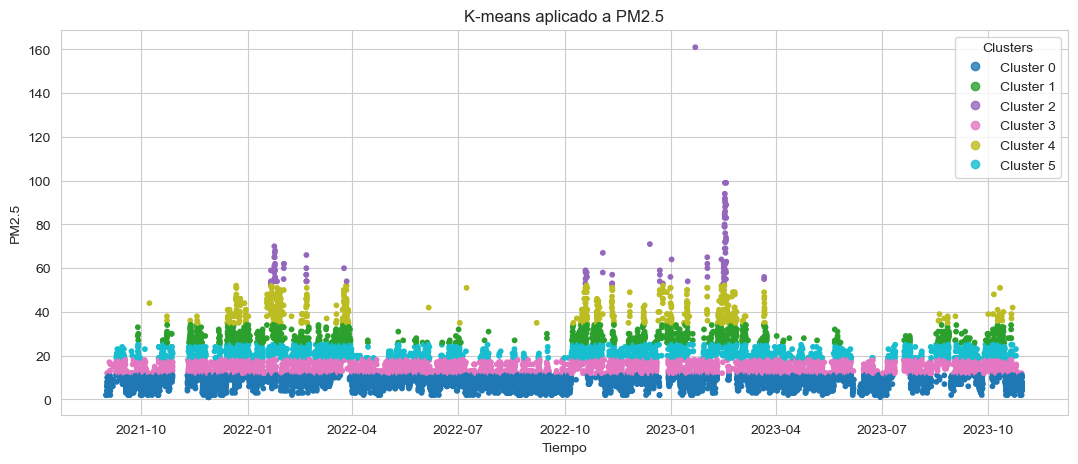

In [30]:
# Se crea el subconjunto con la serie de PM2.5 y la convierte de un vector a una matriz de una unica columna osea una estructura 2D para poder aplicar kmeans
subseq = df["PM2.5"].values.reshape(-1, 1)

# Se estanderiza ya que se va a utilizar clusters
scaler = StandardScaler()
subseq = scaler.fit_transform(subseq)

# Se aplica K-Means con 6 clusters
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(subseq)

labels_kmeans = kmeans.labels_

# Se muestra el numero de clusters junto al numero de observaciones que pertenecen a dicho cluster
print("Etiquetas de clúster:", np.unique(labels_kmeans, return_counts=True))

# Se muestra la primera observacion de cada cluster
lista=[]
for i in range(len(labels_kmeans)):
    if len(lista) < 6:
        if labels_kmeans[i] not in lista:
            lista.append(labels_kmeans[i])
            print(f"La observación {i+1} pertenece al cluster número {labels_kmeans[i]}")

# Visualización de los clusters
plt.figure(figsize=(13,5))
scatter = plt.scatter(df.index, df["PM2.5"], c=labels_kmeans, cmap="tab10", s=10)
plt.title("K-means aplicado a PM2.5")
plt.xlabel("Tiempo")
plt.ylabel("PM2.5")
handles, _ = scatter.legend_elements(prop="colors", alpha=0.8)
plt.legend(handles, [f"Cluster {i}" for i in np.unique(labels_kmeans)], title="Clusters")
plt.show()


**<u>Interpretación resultados</u>.-**

El modelo K-Means ha dividido el conjunto de datos en **6 clústeres distintos** como se le ha indicado en el parámetro `n_clusters`. Las etiquetas obtenidas indican a queclusters ha sido asignado cada observación. A modo de ejemplo, se enumeran las seis primeras observaciones que se incluyen en cada clúster: la observación 1 pertenece al clúster 0, la observación 14 al clúster 3, y así sucesivamente hasta cubrir los seis cluster.

El resumen de etiquetas muestra la distribución total de subsecuencias por clúster:

Clúster 0: 6959 subsecuencias

Clúster 1: 1042 subsecuencias

Clúster 2: 106 subsecuencias

Clúster 3: 4272 subsecuencias

Clúster 4: 544 subsecuencias

Clúster 5: 2269 subsecuencias

Se observa que algunos clústeres son mucho más numerosos (clúster 0 y 3), lo que sugiere que ciertos patrones del nivel de particulas PM2.5 son muy frecuentes en los datos. En contraste, los clústeres 2 y 4 presentan un número reducido de observaciones, lo que indica patrones menos comunes o más específicos. 

Por lo que se puede decir que los valores bajos son los más habituales.

Etiquetas de clúster (incluyendo ruido = -1):
Cluster -1: 2591 observaciones
Cluster 0: 12601 observaciones


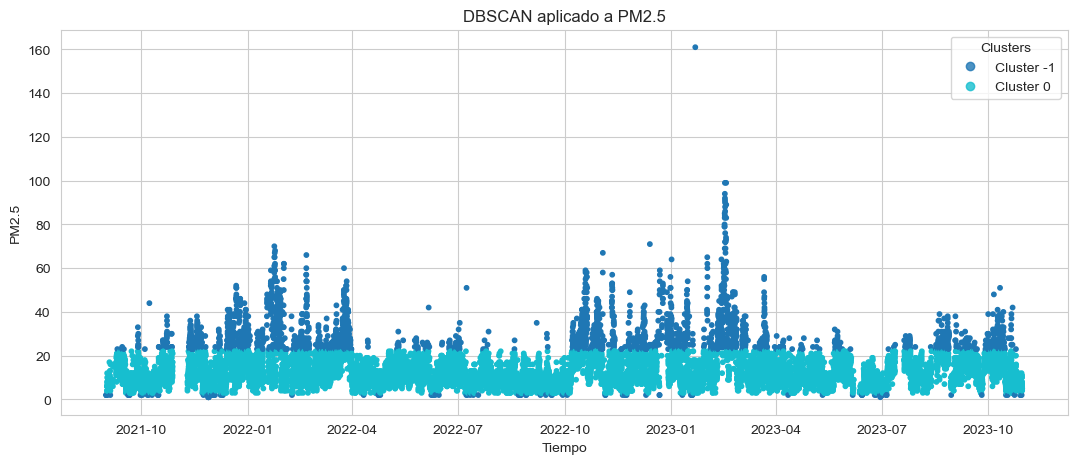

In [31]:
# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=1000)
labels_dbscan = dbscan.fit_predict(subseq)

# Número de clusters detectados y cuantas observaciones le pertenecen
unique, counts = np.unique(labels_dbscan, return_counts=True)
print("Etiquetas de clúster (incluyendo ruido = -1):")
for u, c in zip(unique, counts):
    print(f"Cluster {u}: {c} observaciones")


# Visualización de los clusters
plt.figure(figsize=(13,5))
scatter = plt.scatter(df.index, df["PM2.5"], c=labels_dbscan, cmap="tab10", s=10)
handles, _ = scatter.legend_elements(prop="colors", alpha=0.8)
plt.legend(handles, [f"Cluster {i}" for i in np.unique(labels_dbscan)], title="Clusters")
plt.title("DBSCAN aplicado a PM2.5")
plt.xlabel("Tiempo")
plt.ylabel("PM2.5")
plt.show()

**<u>Interpretación resultados</u>.-**  
El modelo DBSCAN solo ha identificado **un único clúster denso (Cluster 0)** junto con una gran cantidad de puntos clasificados como **ruido (Cluster -1)**. En concreto, DBSCAN ha agrupado **12 601 observaciones** dentro del clúster principal y ha marcado **2 591 observaciones** como ruido. Este patrón es coherente con la estructura de la serie: la mayor parte del tiempo, los valores de PM2.5 se concentran en rangos bajos y moderados, lo que genera una región densa y permanente donde DBSCAN detecta un único clúster dominante.

Los puntos etiquetados como ruido corresponden principalmente a **picos elevados de contaminación**, que quedan aislados debido a la combinación de parámetros escogida (`eps = 0.2`, `min_samples = 1000`). Un valor tan alto de *min_samples* obliga a que solo zonas extremadamente densas sean consideradas clústeres, por lo que cualquier variación significativa, como ascensos bruscos de PM2.5 o periodos con menor densidad temporal queda clasificada como ruido.

Distribución de clústeres GMM:
Cluster 0: 7938 observaciones
Cluster 1: 976 observaciones
Cluster 2: 98 observaciones
Cluster 3: 3293 observaciones
Cluster 4: 618 observaciones
Cluster 5: 2269 observaciones


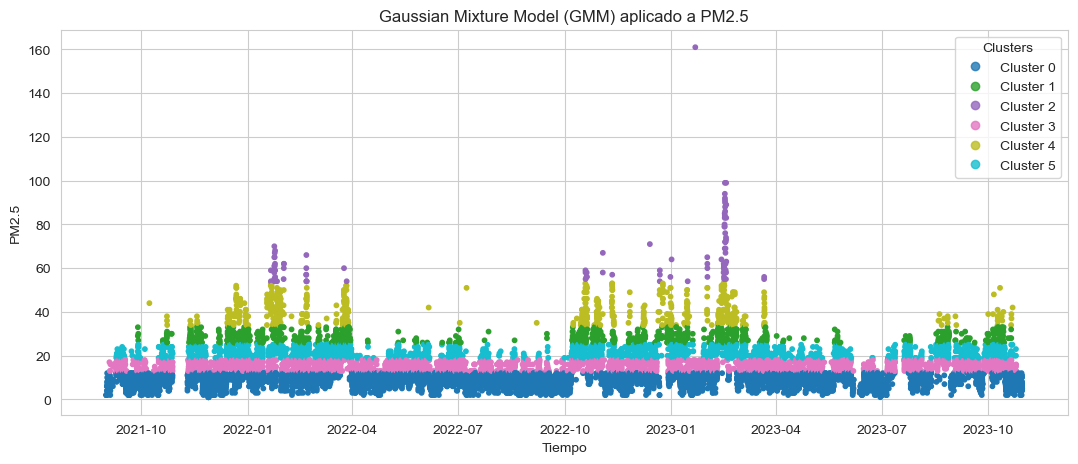

In [32]:
# Modelo GMM con 6 componentes
gmm = GaussianMixture(n_components=6, covariance_type='full', random_state=42)
gmm.fit(subseq)

labels_gmm = gmm.predict(subseq)

# Número de clusters detectados y cuantas observaciones le pertenecen
unique, counts = np.unique(labels_gmm, return_counts=True)
print("Distribución de clústeres GMM:")
for u, c in zip(unique, counts):
    print(f"Cluster {u}: {c} observaciones")

# Visualización de los clusters
plt.figure(figsize=(13,5))
scatter = plt.scatter(df.index, df["PM2.5"], c=labels_gmm, cmap="tab10", s=10)

handles, _ = scatter.legend_elements(prop="colors", alpha=0.8)
plt.legend(handles, [f"Cluster {i}" for i in np.unique(labels_gmm)], title="Clusters")

plt.title("Gaussian Mixture Model (GMM) aplicado a PM2.5")
plt.xlabel("Tiempo")
plt.ylabel("PM2.5")
plt.show()

**<u>Interpretación resultados</u>.-**  
El modelo Gaussian Mixture Models (GMM) ha segmentado la serie temporal de PM2.5 en seis distribuciones gaussianas distintas, cada una representando gaussiana del comportamiento del contaminante. Al igual que con k-means hay clusters claramente mayores como el **Cluster 0**, con 7.938 observaciones, que agrupa la gran mayoría de puntos y corresponde a los valores más bajos y frecuentes de PM2.5, esto indica que la mayor parte del tiempo la calidad del aire se mantiene en niveles relativamente moderados esto se refuerza debido a que los grupos que le siguen los **Clusters 3 (3.293 observaciones)** y **5 (2.269 observaciones)** representan niveles un poco superiores, pero situandose en la parte inferior de la gráfica.

Por otro lado, los **Clusters 1 (976 observaciones)**, **4 (618 observaciones)** y  **2 (98 observaciones)** concentran los valores superiores y los picos más altos de toda la serie. Esto refleja eventos puntuales pero muy intensos de mala calidad del aire.

Como ya se ha explicado este método funciona con probabilidades de pertenecia a una gausiana, a continuación se muestran las probabilidades de múltiples observaciones.

In [33]:
proba=gmm.predict_proba(subseq)
proba = pd.DataFrame(proba)
proba[0:100]

,0,1,2,3,4,5
0,0.997747,4.060799e-14,0.001011,0.001242,1.022751e-07,1.787975e-10
1,0.997747,4.060799e-14,0.001011,0.001242,1.022751e-07,1.787975e-10
2,0.997747,4.060799e-14,0.001011,0.001242,1.022751e-07,1.787975e-10
3,0.997747,4.060799e-14,0.001011,0.001242,1.022751e-07,1.787975e-10
4,0.997747,4.060799e-14,0.001011,0.001242,1.022751e-07,1.787975e-10
...,...,...,...,...,...,...
95,0.000103,2.902184e-02,0.002054,0.137522,2.807977e-03,8.284907e-01
96,0.017427,8.243185e-04,0.001136,0.769566,3.797508e-04,2.106662e-01
97,0.000103,2.902184e-02,0.002054,0.137522,2.807977e-03,8.284907e-01
98,0.006081,2.400474e-03,0.001381,0.614164,6.762320e-04,3.752976e-01


Como se aprecia en la tabal las primeras observaciones se agruparían en el cluster 0 con una probabilidad superior al 99% frente a la observación número 95 que pertenecería al cluster número 5 (82%) o la observación 96 que pertenecería al claster 3 con una probabilidad de 77%.

c:\Users\ergio\anaconda3\envs\tf_env\lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Etiquetas de clúster:
Cluster 0: 10328 observaciones
Cluster 1: 1756 observaciones
Cluster 2: 2516 observaciones
Cluster 3: 223 observaciones
Cluster 4: 66 observaciones
Cluster 5: 303 observaciones


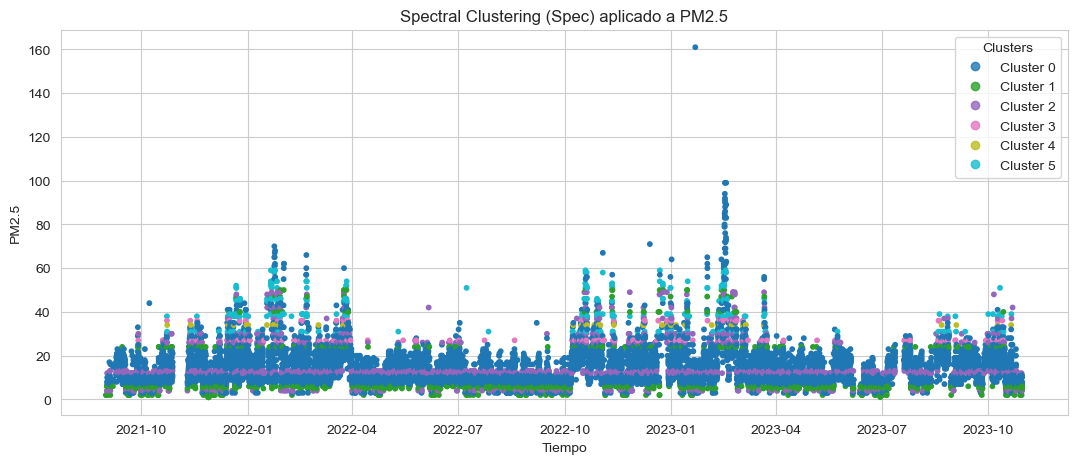

In [34]:
# Aplicar Spectral Clustering con 6 clusters
spec = SpectralClustering(
    n_clusters=6,
    assign_labels='kmeans',
    random_state=42,
    affinity='nearest_neighbors'
)

labels_spec = spec.fit_predict(subseq)

# Número de clusters detectados y cuantas observaciones le pertenecen
unique, counts = np.unique(labels_spec, return_counts=True)
print("Etiquetas de clúster:")
for u, c in zip(unique, counts):
    print(f"Cluster {u}: {c} observaciones")

# Visualización de los clusters
plt.figure(figsize=(13,5))
scatter = plt.scatter(df.index, df["PM2.5"], c=labels_spec, cmap="tab10", s=10)
plt.title("Spectral Clustering (Spec) aplicado a PM2.5")
handles, _ = scatter.legend_elements(prop="colors", alpha=0.8)
plt.legend(handles, [f"Cluster {i}" for i in np.unique(labels_gmm)], title="Clusters")
plt.xlabel("Tiempo")
plt.ylabel("PM2.5")
plt.show()


**<u>Interpretación resultados</u>.-**  
El modelo Spectral Clustering (Spec) ha segmentado la serie temporal de PM2.5 en seis clusters. Al igual que con los anteriores hay clusters claramente mayores como el **Cluster 0**, con 10328 observaciones, que agrupa la gran mayoría de puntos y no corresponde a los valores en una dimensión en específico ya que tanto valores altos como bajos pertenecen a este. Los grupos que le siguen los **Clusters 2 (2516 observaciones)** y **1 (1756 observaciones)** representan a niveles inferiores.

Por otro lado, los **Clusters 5 (303 observaciones)**, **3 (223 observaciones)** y  **4 (66 observaciones)** concentran los valores superiores de la serie.

Una vez explicado el funcionamiento y los outputs de los modelos, se determinará el **número óptimo de clústers**. El objetivo es encontrar el método de asociación y el número de clusters más óptimo par a la base de datos.

Para cada una de estos métodos se aplicarán **tres criterios distintos de selección de clústers**, con el fin de obtener una recomendación robusta:

1. **Método del codo (traceW)**: analiza la disminución de la suma de inercias intra-clúster (suma de las distancias al cuadrado de cada una de las observaciones al respectivo centro del clúster) a medida que aumenta el número de grupos. El número óptimo de clústers se identifica en el punto donde la reducción deja de ser significativa. Siendo el número óptimo de clústeres q el que poseea al valor de k para el cuál se presente una caída repentina y más grande en el WSS.

2. **Estadístico de Gap**: compara la compactación observada con la que cabría esperar en configuraciones aleatorias, seleccionando el número de clústers para el cual la separación entre ambas es máxima.

3. **Silueta promedio**: evalúa simultáneamente la cohesión interna y la separación entre clústers; se elige el número de grupos que maximiza la calidad global de la partición. La silueta para una observación determinada $i$ es una <u>**combinación de la cohesión</u> $a_i$ y $b_i$** definida como: $s_i = \frac{b_i - a_i}{\max\{a_i,\, b_i\}}$. Esto es equivalente a:

\begin{cases}
1 - \dfrac{a_i}{b_i}, & \text{si } a_i < b_i,\\[6pt]
0, & \text{si } a_i = b_i,\\[6pt]
\dfrac{b_i}{a_i} - 1, & \text{si } a_i > b_i.
\end{cases}

Antes de realizar la interpretación cabe resaltar que la interpretación del valor de la Silueta Promedio seguirá la regla empírica comúnmente aceptada la cual es:

- Si la silueta promedio está entre $0.71$ y $1$ entonces la estructura de clasificación encontrada es fuerte.

- Si la silueta promedio está entre $0.51$ y $0.7$ entonces la estructura de clasificación encontrada es razonable (aceptable).

- Si la silueta promedio está entre $0.26$ y $0.50$ entonces la estructura de clasificación encontrada es débil y puede ser artificial.

- Si la silueta promedio es $< 0.25$ entonces no se ha encontrado una estructura de clasificación.




Para el modelo DBSCAN no se puede ni el método del codo ni el del estadistico GMM esto se debe a que no usa el parámetro k (número de clusters) ya que debido a que su algoritmo basado en densidad local los parámetros usados son eps (distancia del radio) y el número de puntos mínimo para considerar que un punto sea nucleo de un cluster además de que no usa centroides por lo que no hay suma de cuadrados dentro de clústeres (WSS).

Para este método se aplicará el promedio de la silueta y dos comparaciones, la primera sería en función del radio (eps) el número de clusters que se forman y la segunda sería tambien respecto al radio el número de observaciones clasificadas como outliers (cluster -1)

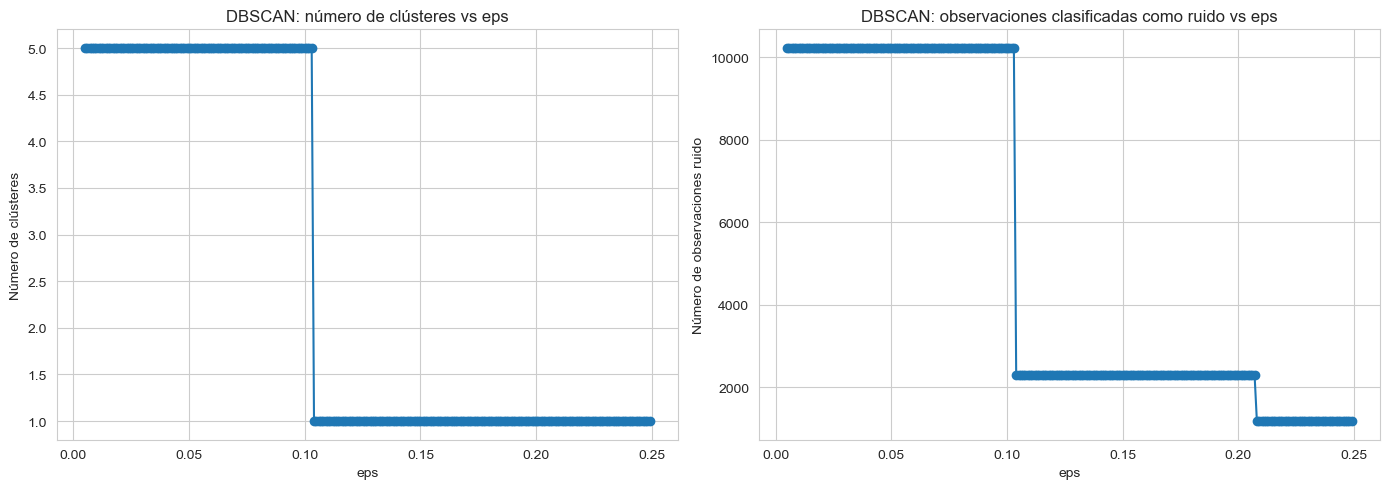

El primer eps:0.0050 que posee 10226 número de observaciones anómalas
El primer eps:0.1040 que posee 2298 número de observaciones anómalas
El primer eps:0.2080 que posee 1176 número de observaciones anómalas
El primer eps:0.0050 que posee 5 número de clusters
El primer eps:0.1040 que posee 1 número de clusters


In [35]:

# Grip de valores eps
eps_values = np.arange(0.005, 0.25, 0.001)
min_samples = 900

n_clusters = []
n_noise = []

for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(subseq)

    # Clústeres distintos de -1 (ruido)
    clusters_eps = set(labels)
    clusters_eps.discard(-1)
    n_clusters.append(len(clusters_eps))

    # Número de observaciones ruido
    n_noise.append(np.sum(labels == -1))

plt.figure(figsize=(14,5))

# Gráfica 1: número de clústeres vs eps
plt.subplot(1,2,1)
plt.plot(eps_values, n_clusters, marker="o")
plt.xlabel("eps")
plt.ylabel("Número de clústeres")
plt.title("DBSCAN: número de clústeres vs eps")

# Gráfica 2: número de observaciones ruido vs eps
plt.subplot(1,2,2)
plt.plot(eps_values, n_noise, marker="o")
plt.xlabel("eps")
plt.ylabel("Número de observaciones ruido")
plt.title("DBSCAN: observaciones clasificadas como ruido vs eps")

plt.tight_layout()
plt.show()

lista=np.unique(n_noise)
for i in range(len(lista)):
    primera_obs = n_noise.index(lista[len(lista)-i-1])
    print(f"El primer eps:{eps_values[primera_obs]:.4f} que posee {lista[len(lista)-i-1]} número de observaciones anómalas")

lista=np.unique(n_clusters)
for i in range(len(lista)):
    primera_obs = n_clusters.index(lista[len(lista)-i-1])
    print(f"El primer eps:{eps_values[primera_obs]:.4f} que posee {lista[len(lista)-i-1]} número de clusters")

**<u>Interpretación resultados</u>.-**  
El comportamiento de DBSCAN en este conjunto confirma que el parámetro $eps$ controla la estructura que el algoritmo es capaz de detectar. 

A partir de los resultados obtenidos, se identifican **tres valores relevantes de `eps`**:  $$eps = \{0.005,\; 0.104,\; 0.208\}$$ 

Ya que estos valores indican los intervalos de eps que identifican los mismos puntos anómalos, el primero sería $[0.005, 0.104]$ que identifica $10226$ observaciones anómalos, seguido de $[0.104, 0.208]$ con $2298$ y el último sería de $[0.208, 0.25]$ con $1176$. entre estos tres valores se destaca, **$eps = 0.104$** ya que actúa como un **umbral estructural**,al ser el punto donde se produce el único cambio en el número de clústeres detectados.


  
Com se observa en la primera gráfica para valores muy bajos de `eps` (en torno a $0.005$), DBSCAN clasifica una proporción muy elevada de observaciones como ruido (más de 10 000 puntos). Esto indica que, bajo un criterio de vecindad muy estricto, la serie no presenta regiones suficientemente densas como para formar clústeres estables. En torno a $eps = 0.104$ se observa simultáneamente un **cambio abrupto en el número de clústeres**, que pasa de varios clústeres a una única estructura dominante, y  una **reducción muy acusada del número de observaciones clasificadas como ruido**, que desciende de forma drástica.

Este comportamiento identifica claramente un **punto de transición**, donde el radio de vecindad comienza a ser suficiente para conectar observaciones previamente aisladas (outliers) y consolidar regiones de densidad coherente. Por ello este valor de `eps` es el más informativo, ya que marca el inicio de una estructura interpretable.

Para valores de `eps` mayores a $0.208$, el número de observaciones consideradas ruido continúa disminuyendo, pero a costa de una **pérdida de resolución**, ya que los clústeres tienden a fusionarse. Con estos parámetros, DBSCAN deja de discriminar subestructuras y pasa a describir agrupaciones muy amplias, lo que puede resultar poco informativo para el análisis fino de la serie temporal.


Al tener encuenta las dos gráficas se puede decir que la serie presenta una estructura **densa**, sin núcleos compactos bien definidos.  

Para el métodod SpectralClustering no he sido incapaz de encontrar una forma directa de aplicar el método del codo ya que no hay WSS ya que el algoritmo no define de forma explícita una función de dispersión intra-clúster pero según he encontrado en internet se usa SpectralEmbedding para calcularlo en el de proyección.

c:\Users\ergio\anaconda3\envs\tf_env\lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


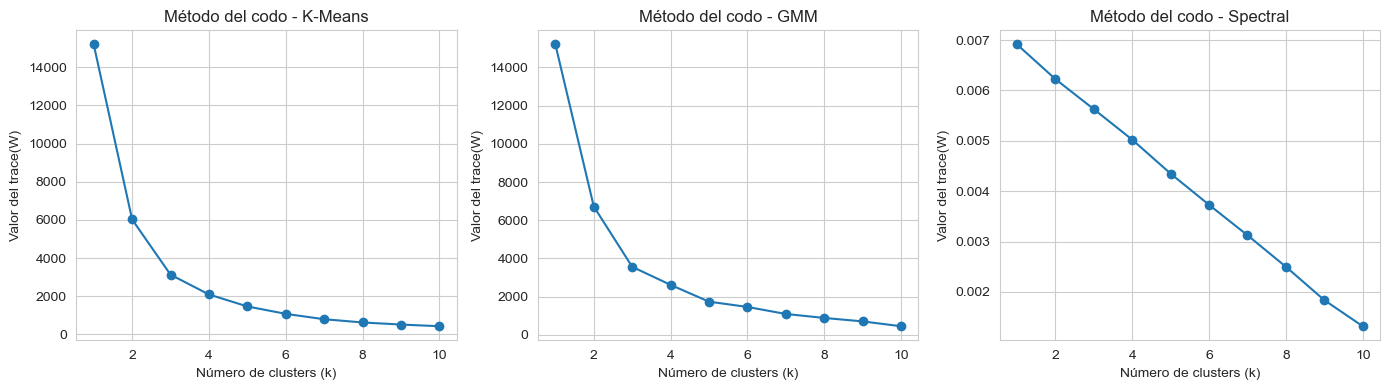

Diferencias marginales (caída de la función objetivo):

k =  2 | K-Means = 9168.6563 | GMM = 8474.3396 | Spectral = 0.0007
k =  3 | K-Means = 2891.2992 | GMM = 3152.8888 | Spectral = 0.0006
k =  4 | K-Means = 1037.3736 | GMM = 946.5436 | Spectral = 0.0006
k =  5 | K-Means = 626.7492 | GMM = 876.3708 | Spectral = 0.0007
k =  6 | K-Means = 389.7959 | GMM = 276.6170 | Spectral = 0.0006
k =  7 | K-Means = 280.6569 | GMM = 368.1160 | Spectral = 0.0006
k =  8 | K-Means = 169.7051 | GMM = 207.1931 | Spectral = 0.0006
k =  9 | K-Means = 109.2885 | GMM = 180.3415 | Spectral = 0.0007
k = 10 | K-Means = 88.2283 | GMM = 252.9643 | Spectral = 0.0005

 Número óptimo de clusters según el método del codo:

K-Means k = 2 (9168.6563)
GMM  k = 2 (8474.3396)
Spectral k = 2 (0.0007)


In [36]:
k_range = range(1, 11)


# K-MEANS
inertia_kmeans = []

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(subseq)
    inertia_kmeans.append(km.inertia_)


# GMM 
inertia_gmm = []

for k in k_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels = gmm.fit_predict(subseq)
    centers = gmm.means_
    dist = pairwise_distances(subseq, centers)
    inertia_gmm.append(np.sum(dist[np.arange(len(subseq)), labels] ** 2))


# SPECTRAL CLUSTERING
inertia_spec = []

embedding = SpectralEmbedding(n_components=10, random_state=42)
X_spec = embedding.fit_transform(subseq)

for k in k_range:
    km_spec = KMeans(n_clusters=k, random_state=42, n_init=10)
    km_spec.fit(X_spec)
    inertia_spec.append(km_spec.inertia_)


# GRÁFICAS
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
plt.plot(k_range, inertia_kmeans, marker="o")
plt.title("Método del codo - K-Means")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Valor del trace(W)")

plt.subplot(1,3,2)
plt.plot(k_range, inertia_gmm, marker="o")
plt.title("Método del codo - GMM")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Valor del trace(W)")

plt.subplot(1,3,3)
plt.plot(k_range, inertia_spec, marker="o")
plt.title("Método del codo - Spectral")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Valor del trace(W)")

plt.tight_layout()
plt.show()

delta_kmeans = []
delta_gmm = []
delta_spec = []

k_vals = list(k_range)

for i in range(1, len(k_vals)):
    delta_kmeans.append(inertia_kmeans[i-1] - inertia_kmeans[i])
    delta_gmm.append(inertia_gmm[i-1] - inertia_gmm[i])
    delta_spec.append(inertia_spec[i-1] - inertia_spec[i])

print("Diferencias marginales (caída de la función objetivo):\n")

for i, k in enumerate(k_vals[1:]):
    print(
        f"k = {k:2d} | "
        f"K-Means = {delta_kmeans[i]:.4f} | "
        f"GMM = {delta_gmm[i]:.4f} | "
        f"Spectral = {delta_spec[i]:.4f}"
    )

# Máxima caída y k asociado
k_kmeans = k_vals[np.argmax(delta_kmeans)]
k_gmm    = k_vals[np.argmax(delta_gmm)]
k_spec   = k_vals[np.argmax(delta_spec)]

print("\n Número óptimo de clusters según el método del codo:\n")
print(f"K-Means k = {k_kmeans+1} ({max(delta_kmeans):.4f})")
print(f"GMM  k = {k_gmm+1} ({max(delta_gmm):.4f})")
print(f"Spectral k = {k_spec+1} ({max(delta_spec):.4f})")

**<u>Interpretación resultados</u>.-**  

El análisis del **método del codo** se ha aplicado de forma comparativa a **K-Means**, **Gaussian Mixture Models (GMM)** y **Spectral Clustering**, evaluando la evolución de la variabilidad intra–clúster ($traceW$ o su aproximación) conforme aumenta el número de clústeres $k$.

En los modelos **K-Means** y **GMM** se observa una **caída extremadamente pronunciada de la función objetivo al pasar de $k=1$ a $k=2$**. Esta primera reducción concentra la mayor parte de la ganancia explicativa, lo que indica que separar la serie en **dos grandes grupos** supone el mayor incremento en homogeneidad interna. A partir de ese punto, las reducciones adicionales de la variabilidad son progresivamente menores.

De forma más concreta, en **K-Means** la caída inicial es muy acusada $\Delta W \approx 9169$, seguida de descensos cada vez más moderados para $k \geq 3$, lo que sugiere una clara **pérdida de eficiencia marginal** al aumentar el número de clústeres. Un patrón análogo se observa en **GMM**, donde la mayor reducción también se produce en $k=2$, mientras que incrementos posteriores de $k$ no aportan mejoras comparables en términos de dispersión intra–clúster.

En el caso de **Spectral Clustering**, aunque la escala del $traceW$ es distinta debido al uso del *embedding* espectral, el comportamiento relativo es consistente: la **mayor caída se produce igualmente en $k=2$**, y las variaciones posteriores son prácticamente constantes, lo que indica que el modelo no obtiene una ganancia estructural relevante al aumentar el número de clústeres a no poder observar es punro de $codo$.

Al centrarse en el análisis cuantitativo de las **diferencias marginales** refuerza esta conclusión, ya que en los tres métodos el máximo descenso de la función objetivo se alcanza en $k=2$. Por tanto, desde el punto de vista del **criterio del codo**, los tres algoritmos coinciden en señalar que **$k=2$** es el número óptimo de clústeres.


c:\Users\ergio\anaconda3\envs\tf_env\lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


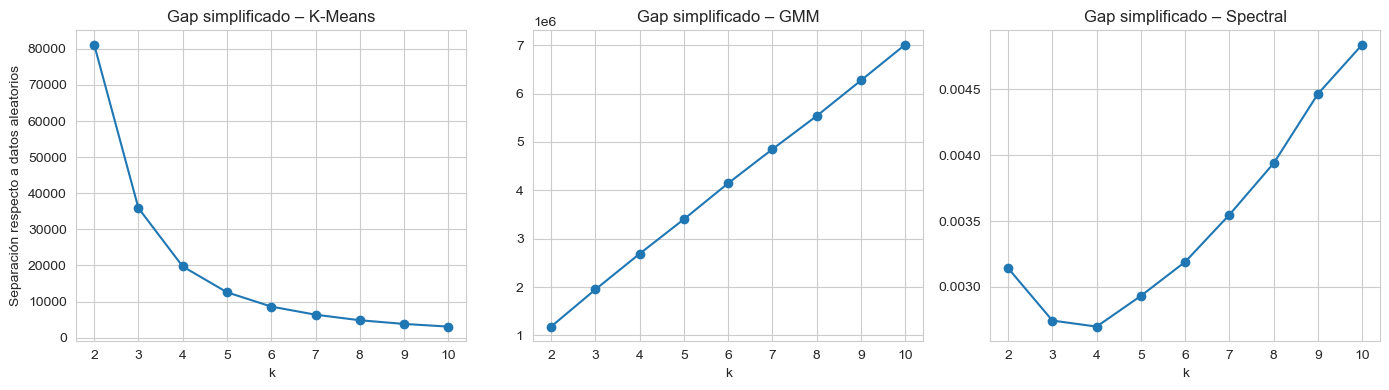

Valor del estadístico Gap:

k =  2 | K-Means =  81199.4851 | GMM =  1180859.7770 | Spectral =  0.0031
k =  3 | K-Means =  35886.6039 | GMM =  1949138.7788 | Spectral =  0.0027
k =  4 | K-Means =  19717.6493 | GMM =  2688499.9612 | Spectral =  0.0027
k =  5 | K-Means =  12559.7119 | GMM =  3402316.4117 | Spectral =  0.0029
k =  6 | K-Means =  8600.2796 | GMM =  4147225.2729 | Spectral =  0.0032
k =  7 | K-Means =  6350.3968 | GMM =  4851776.6315 | Spectral =  0.0035
k =  8 | K-Means =  4808.8051 | GMM =  5539369.7549 | Spectral =  0.0039
k =  9 | K-Means =  3791.4002 | GMM =  6274641.4180 | Spectral =  0.0045
k = 10 | K-Means =  3044.8586 | GMM =  7015730.2574 | Spectral =  0.0048

Número óptimo de clusters según el estadístico Gap:

K-Means   : k = 2 (81199.4851)
GMM       : k = 10 (7015730.2574)
Spectral  : k = 10 (0.0048)


In [37]:

k_range = range(2, 11)
B = 10  # pocas simulaciones para simplicidad
X = subseq

def reference_data(X):
    X_ref = np.zeros_like(X)
    for j in range(X.shape[1]):
        X_ref[:, j] = np.random.uniform(X[:, j].min(), X[:, j].max(), size=X.shape[0])
    return X_ref

# K-MEANS
gap_kmeans = []

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    Wk = km.inertia_

    Wk_ref = np.mean([
        KMeans(n_clusters=k, n_init=10, random_state=42)
        .fit(reference_data(X)).inertia_
        for _ in range(B)
    ])

    gap_kmeans.append(Wk_ref - Wk)

# GMM
gap_gmm = []

for k in k_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels = gmm.fit_predict(X)
    centers = gmm.means_
    dist = pairwise_distances(X, centers)
    Wk = np.sum(dist[np.arange(len(X)), labels] ** 2)

    Wk_ref = np.mean([
        np.sum(
            pairwise_distances(
                reference_data(X),
                GaussianMixture(n_components=k, random_state=42)
                .fit(reference_data(X)).means_
            ) ** 2
        )
        for _ in range(B)
    ])

    gap_gmm.append(Wk_ref - Wk)

# SPECTRAL
embedding = SpectralEmbedding(n_components=10, random_state=42)
X_spec = embedding.fit_transform(X)

gap_spec = []

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_spec)
    Wk = km.inertia_

    Wk_ref = np.mean([
        KMeans(n_clusters=k, n_init=10, random_state=42)
        .fit(reference_data(X_spec)).inertia_
        for _ in range(B)
    ])

    gap_spec.append(Wk_ref - Wk)


# GRÁFICAS
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
plt.plot(k_range, gap_kmeans, marker="o")
plt.title("Gap simplificado – K-Means")
plt.xlabel("k")
plt.ylabel("Separación respecto a datos aleatorios")

plt.subplot(1,3,2)
plt.plot(k_range, gap_gmm, marker="o")
plt.title("Gap simplificado – GMM")
plt.xlabel("k")

plt.subplot(1,3,3)
plt.plot(k_range, gap_spec, marker="o")
plt.title("Gap simplificado – Spectral")
plt.xlabel("k")

plt.tight_layout()
plt.show()

import numpy as np

k_vals = list(k_range)

print("Valor del estadístico Gap:\n")


# Muestra el valor del estadistico para cada k
for i in range(len(k_vals)):
    k = k_vals[i] 
    print(
        f"k = {k:2d} | "
        f"K-Means = {gap_kmeans[i]: .4f} | "
        f"GMM = {gap_gmm[i]: .4f} | "
        f"Spectral = {gap_spec[i]: .4f}"
    )

# k óptimo 
k_kmeans = k_vals[:][np.argmax(gap_kmeans)]
k_gmm    = k_vals[:][np.argmax(gap_gmm)]
k_spec   = k_vals[:][np.argmax(gap_spec)]

print("\nNúmero óptimo de clusters según el estadístico Gap:\n")
print(f"K-Means   : k = {k_kmeans} ({max(gap_kmeans):.4f})")
print(f"GMM       : k = {k_gmm} ({max(gap_gmm):.4f})")
print(f"Spectral  : k = {k_spec} ({max(gap_spec):.4f})")



**<u>Interpretación resultados</u>.-**  

El análisis del **estadístico Gap** para **K-Means**, **Gaussian Mixture Models (GMM)** y **Spectral Clustering** permite evaluar si la estructura de clústeres observada en los datos es significativamente mejor que la que se obtendría bajo un modelo nulo (datos sin estructura).


En los modelos **GMM** y **Spectral Clustering** se observa que **crece de manera prácticamente monótona** a medida que aumenta el valor de $k$, alcanzando el valor máximo en $k=10$ (el límite superior evaluado). Esto sugiere que tanto las mezclas gaussianas ni la estructura de conectividad detectada son capaces de identificar los clusters de forma óptima por eso para ambos modelos el estadístico Gap **no identifica un número óptimo de clústeres bien definido**

Respecto al modelo **K-Means** el estadístico Gap alcanza su **máximo en $k = 2$** y decrece de forma monótona conforme aumenta $k$. Esto indica que la mayor ganancia frente al modelo nulo se obtiene al pasar de un único grupo a dos clústeres, mientras que añadir más clústeres no aporta mejoras en términos de separación estructural. Por lo que desde la perspectiva del Gap, **$k = 2$** es la elección óptima para k-means al igual que con el método del codo.

Las gráficas del Gap se pueden observar estas conclusiones ya que en **K-Means**, la curva decreciente muestra que la principal ganancia estructural se obtiene con muy pocos clústeres, siendo $k=2$ el punto más relevante.
Y en **GMM** y **Spectral Clustering**, las curvas son crecientes por lo que hay ausencia de un máximo interno.

c:\Users\ergio\anaconda3\envs\tf_env\lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


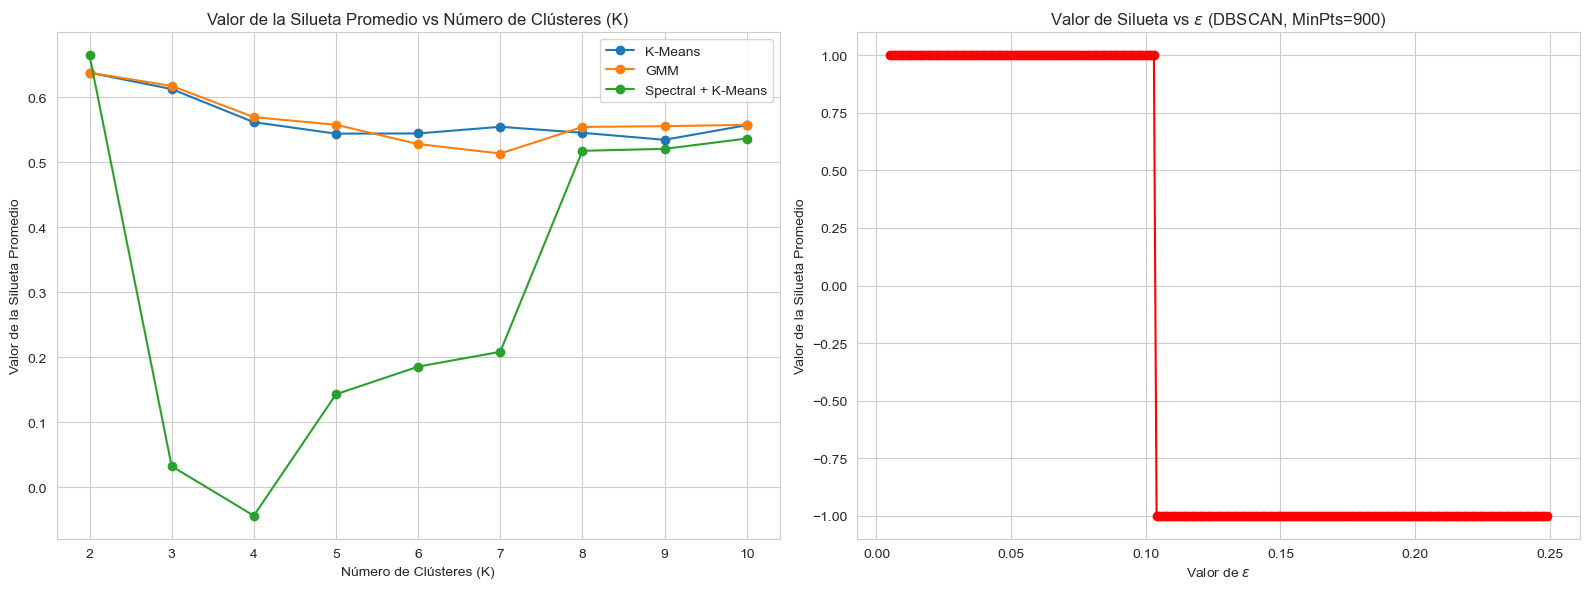

Valor del estadístico promedio siuleta:

k =  2 | K-Means =  0.6375 | GMM =  0.6375 | Spectral =  0.6642
k =  3 | K-Means =  0.6123 | GMM =  0.6171 | Spectral =  0.0326
k =  4 | K-Means =  0.5615 | GMM =  0.5692 | Spectral = -0.0435
k =  5 | K-Means =  0.5438 | GMM =  0.5574 | Spectral =  0.1432
k =  6 | K-Means =  0.5441 | GMM =  0.5278 | Spectral =  0.1857
k =  7 | K-Means =  0.5543 | GMM =  0.5133 | Spectral =  0.2085
k =  8 | K-Means =  0.5451 | GMM =  0.5541 | Spectral =  0.5175
k =  9 | K-Means =  0.5343 | GMM =  0.5553 | Spectral =  0.5204
k = 10 | K-Means =  0.5568 | GMM =  0.5574 | Spectral =  0.5363

Número de clusters óptimos según la siuleta:
K-Means      : k = 2 (Silueta Máx: 0.6375)
GMM          : k = 2 (Silueta Máx: 0.6375)
Spectral     : k = 2 (Silueta Máx: 0.6642)
DBSCAN (MinPts=900): eps = 0.0050 (Silueta Máx: 1.0000)


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.manifold import SpectralEmbedding
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs


eps_values = np.arange(0.005, 0.25, 0.001)
min_samples = 900 

# Inicialización de listas para almacenar los puntajes
sil_kmeans = []
sil_gmm = []
sil_spec = []
sil_dbscan = []


# Al igual que en el k-means se debe hacer un prepocesamiento
embedding = SpectralEmbedding(n_components=10, random_state=42)
X_spec = embedding.fit_transform(subseq)

for k in k_range:
    # K-MEANS
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_km = km.fit_predict(subseq)
    
    # GMM
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels_gmm = gmm.fit_predict(subseq)
    
    # SPECTRAL + K-MEANS
    km_spec = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_spec = km_spec.fit_predict(X_spec)
    
    # Se calcula el valor de la silueta solo si hay más de un clúster
    if len(np.unique(labels_km)) > 1:
        sil_kmeans.append(silhouette_score(subseq, labels_km))
    else:
        sil_kmeans.append(-1.0)
    
    if len(np.unique(labels_gmm)) > 1:
        sil_gmm.append(silhouette_score(subseq, labels_gmm))
    else:
        sil_gmm.append(-1.0)

    if len(np.unique(labels_spec)) > 1:
        # Importante: Silueta se calcula sobre los datos ORIGINALES (subseq)
        sil_spec.append(silhouette_score(subseq, labels_spec))
    else:
        sil_spec.append(-1.0)

# DBSCAN
for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels_db = db.fit_predict(subseq)
    
    # Número de clústeres distintos de -1 (ruido)
    n_distinct_clusters = len(set(labels_db)) - (1 if -1 in labels_db else 0)
    
    if n_distinct_clusters >= 2:
        # Se excluyen los puntos de ruido del cálculo de Silueta 
        valid_indices = labels_db != -1
        score = silhouette_score(subseq[valid_indices], labels_db[valid_indices])
        sil_dbscan.append(score)
    else:
        sil_dbscan.append(-1.0) # Si no hay suficiente clustering, se asigna un puntaje bajo

# GRÁFICAS
plt.figure(figsize=(16, 6))

# Subplot 1: kmeans, gmm y spec
plt.subplot(1, 2, 1)
k_vals = list(k_range)
plt.plot(k_vals, sil_kmeans, marker="o", label="K-Means")
plt.plot(k_vals, sil_gmm, marker="o", label="GMM")
plt.plot(k_vals, sil_spec, marker="o", label="Spectral + K-Means")
plt.title("Valor de la Silueta Promedio vs Número de Clústeres (K)")
plt.xlabel("Número de Clústeres (K)")
plt.ylabel("Valor de la Silueta Promedio")
plt.grid(True)
plt.legend()
plt.xticks(k_vals)


# Subplot 2: DBSCAN
plt.subplot(1, 2, 2)
plt.plot(eps_values, sil_dbscan, marker="o", color='red')
plt.title(f"Valor de Silueta vs $\epsilon$ (DBSCAN, MinPts={min_samples})")
plt.xlabel("Valor de $\epsilon$")
plt.ylabel("Valor de la Silueta Promedio")
plt.grid(True)


plt.tight_layout()
plt.show()


k_vals_arr = np.array(k_vals)

# Encontrar el K óptimo para cada modelo
k_kmeans_opt = k_vals_arr[np.argmax(sil_kmeans)]
k_gmm_opt = k_vals_arr[np.argmax(sil_gmm)]
k_spec_opt = k_vals_arr[np.argmax(sil_spec)]

# Encontrar el eps óptimo para DBSCAN
if np.max(sil_dbscan) > -1.0:
    eps_opt = eps_values[np.argmax(sil_dbscan)]
    sil_dbscan_max = np.max(sil_dbscan)
else:
    eps_opt = "N/A"
    sil_dbscan_max = -1.0


print("Valor del estadístico promedio siuleta:\n")
# Muestra el valor del estadistico para cada k
for i in range(len(k_vals)):
    k = k_vals[i] 
    print(
        f"k = {k:2d} | "
        f"K-Means = {sil_kmeans[i]: .4f} | "
        f"GMM = {sil_gmm[i]: .4f} | "
        f"Spectral = {sil_spec[i]: .4f}"
    )

print("\nNúmero de clusters óptimos según la siuleta:")

print(f"K-Means      : k = {k_kmeans_opt} (Silueta Máx: {np.max(sil_kmeans):.4f})")
print(f"GMM          : k = {k_gmm_opt} (Silueta Máx: {np.max(sil_gmm):.4f})")
print(f"Spectral     : k = {k_spec_opt} (Silueta Máx: {np.max(sil_spec):.4f})")
print(f"DBSCAN (MinPts={min_samples}): eps = {eps_opt:.4f} (Silueta Máx: {sil_dbscan_max:.4f})")

**<u>Interpretación resultados</u>.-**  

El análisis del **estadistico de la Silueta Promedio** para **K-Means**, **Gaussian Mixture Models (GMM)** y **Spectral Clustering** permite evaluar la calidad geométrica de las particiones obtenidas, midiendo simultáneamente la **cohesión intra–clúster** y la **separación inter–clúster**.

En los tres métodos se observa que el **valor máximo de la silueta se alcanza en $k = 2$**, con valores de **$0.6375$** para **K-Means** y **GMM**, y **$0.6642$** para **Spectral Clustering**. De acuerdo con la regla empírica adoptada, estos valores se sitúan en el rango de **estructura razonable (aceptable)**, lo que indica la presencia de una partición estable y bien separada en dos grupos principales.

A partir de $k \geq 3$, la silueta promedio **disminuye progresivamente** en **K-Means** y **GMM**, reflejando una pérdida de separación al introducir clusters adicionales. En **Spectral Clustering**, tras el máximo en $k=2$, los valores presentan mayor variabilidad y solo recuperan niveles moderados para valores altos de $k$, sin superar el máximo inicial.

En cuanto a **DBSCAN**, el valor máximo de silueta igual a **1.0** obtenido para lo valores de $\varepsilon$ en el intervalo $[0.005,0.1040]$ no es interpretable, ya que corresponde a configuraciones con un único clúster efectivo (excluyendo el ruido), situación en la que la silueta pierde significado. Por tanto, este método no puede evaluarse de forma fiable mediante este criterio en el presente análisis.


**<u>Conclusión</u>.-**  

Con los resultados obtenidos el modelo **DBSCAN** no resulta adecuado para este conjunto de datos. En particular, el algoritmo solo produce dos soluciones:  
- Una partición en **5 clústeres** que clasifica **más de 10 000 observaciones como ruido** sobre un total de 15 000, lo que supone una pérdida excesiva de información. 
- Una solución con **un único clúster**, en la que el algoritmo deja de realizar una segmentación efectiva y se limita únicamente a la identificación de observaciones anómalas.  

En consecuencia, DBSCAN no proporciona una estructura de clústeres interpretable ni estable para este problema.

Respecto a los otros modelos, el **único algoritmo en el que coinciden los tres criterios de selección** (**método del codo**, **estadístico Gap** y **silueta promedio**) es **K-Means con $k = 2$**. Además, este modelo presenta la **mayor caída de la función objetivo** en el método del codo y el **valor máximo de silueta promedio**, lo que indica una partición razonablemente bien separada y estable. Por estos motivos, **K-Means con $k=2$** se selecciona como el **modelo más óptimo** entre los cuatro analizados.

En los casos de **Spectral Clustering** y **Gaussian Mixture Models (GMM)**, aunque el estadístico Gap no identifica un máximo claro, los otros dos (método del codo y silueta promedio) coinciden también en señalar **$k = 2$** como la opción más adecuada. Por tanto, como **dos de los tres criterios** coiciden el valor de $k=2$ se considera igualmente el más razonable para ambos modelos.



- b) subsecuencias:

Para este segundo apratado se usará el k-means ya explicado y el DTW explicado a continuación.

La **deformación temporal dinámica (DTW)** es un algoritmo que compara dos conjuntos de datos temporales (como dos secuencias numéricas) para encontrar similitudes. Esto se logra ajustando la sincronización de los puntos de datos para minimizar la diferencia entre ambos conjuntos. A diferencia de métodos simples como la distancia euclidiana , que solo son eficaces cuando las secuencias tienen la misma longitud y están perfectamente alineadas, la DTW permite comparar secuencias de longitudes desiguales y desincronizadas.

Para calcular las distancias en DWT realiza los siguinetes pasos:

- Paso 1: Construcción de la matriz de distancias
El primer paso en DTW consiste en construir una matriz de distancias entre las dos secuencias. Cada elemento de la matriz representa la distancia (normalmente euclidiana) entre los puntos correspondientes de ambas secuencias.

- Paso 2: Matriz de costos y costo acumulado
A continuación, se crea una matriz de costos acumulando las distancias mínimas desde el inicio de las secuencias hasta el punto actual. Este costo acumulado representa la distancia acumulada de la ruta óptima hasta ese punto.

- Paso 3: Búsqueda de la ruta óptima
La ruta de alineación óptima se determina retrocediendo desde el último elemento de la matriz de costos hasta el primer elemento . Esta ruta representa la mejor alineación entre las dos secuencias, minimizando la distancia total.

- Paso 4: Ruta de deformación
La ruta de deformación muestra cómo se puede deformar (estirar o comprimir) una secuencia a lo largo del eje del tiempo para que coincida mejor con la otra secuencia.

En el contexto del **clustering**, la DTW se utiliza como medida de similitud entre subsecuencias temporales. En lugar de agrupar por valores exactamente coincidentes, agrupa por **formas** o **tendencias** similares en el tiempo, incluso si no están perfectamente sincronizadas. Para aplicarla, se generan subsecuencias de longitud fija (ventanas deslizantes) y posteriormente se emplea un algoritmo como *TimeSeriesKMeans*, que permite utilizar DTW como métrica interna. De este modo, los clústeres resultantes representan patrones temporales recurrentes en la serie original, capturando comportamientos típicos que no se detectan con técnicas tradicionales basadas en distancias euclidianas.


Etiquetas de clúster: (array([0, 1, 2, 3, 4, 5], dtype=int32), array([5517, 1969,  386, 4270, 2510,  373]))
La observación 1 pertenece al cluster número 3
La observación 141 pertenece al cluster número 0
La observación 1078 pertenece al cluster número 4
La observación 1152 pertenece al cluster número 1
La observación 2501 pertenece al cluster número 2
La observación 2627 pertenece al cluster número 5


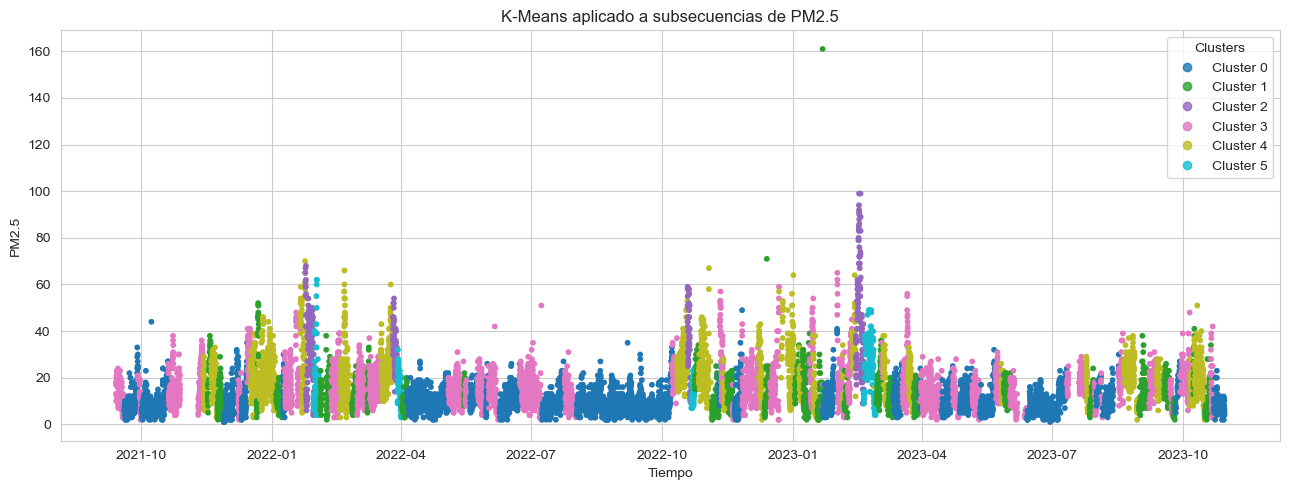

In [39]:
# Ejemplo de subsecuencias de 7 días
window_size = 7*24
subseq = []

for i in range(len(df) - window_size + 1):
    subseq.append(df["PM2.5"].iloc[i:i+window_size].values)

subseq = np.array(subseq)  

# K-Means con 6 clusters
k=6
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(subseq)

labels = kmeans.labels_

print("Etiquetas de clúster:", np.unique(labels, return_counts=True))

lista=[]
for i in range(len(labels)):
    if len(lista) < 6:
        if labels[i] not in lista:
            lista.append(labels[i])
            print(f"La observación {i+1} pertenece al cluster número {labels[i]}")

# Se asigna cada clúster al último instante de su ventana
time_index = df.index[window_size - 1:]
plt.figure(figsize=(13, 5))
scatter = plt.scatter(
    time_index,
    df["PM2.5"].iloc[window_size - 1:],
    c=labels,
    cmap="tab10",
    s=10
)

plt.title("K-Means aplicado a subsecuencias de PM2.5")
plt.xlabel("Tiempo")
plt.ylabel("PM2.5")

handles, _ = scatter.legend_elements(prop="colors", alpha=0.8)
plt.legend(handles, [f"Cluster {i}" for i in range(k)], title="Clusters")

plt.tight_layout()
plt.show()


**<u>Interpretación resultados</u>.-**

El modelo K-Means ha dividido el conjunto de datos en **6 clústeres distintos**. Las etiquetas obtenidas muestran que cada subsecuencia ha sido asignada a uno de los seis patrones temporales detectados. A modo de ejemplo, se enumeran las seis primeras observaciones que se incluyen en cada clúster: la observación 1 pertenece al clúster 3, la observación 141 al clúster 0, y así sucesivamente hasta cubrir los seis cluster.

El resumen de etiquetas muestra la distribución total de subsecuencias por clúster:

Clúster 0: 5517 subsecuencias

Clúster 1: 1969 subsecuencias

Clúster 2: 386 subsecuencias

Clúster 3: 4270 subsecuencias

Clúster 4: 2510 subsecuencias

Clúster 5: 373 subsecuencias

Se observa que algunos clústeres son mucho más numerosos (clúster 0 y 3), lo que sugiere que ciertos patrones semanales del nivel de particulas PM2.5 son muy frecuentes en los datos. En contraste, los clústeres 2 y 5 presentan un número reducido de subsecuencias, lo que indica patrones menos comunes o más específicos. 

Además a simple vista no se ve un patrón entre los clusters como se podía intuir en los casos de serie completa.

Distribución de clusters: (array([0, 1, 2, 3]), array([182, 165, 237, 152]))
La observación 1 pertenece al cluster número 2
La observación 7 pertenece al cluster número 1
La observación 8 pertenece al cluster número 0
La observación 14 pertenece al cluster número 3


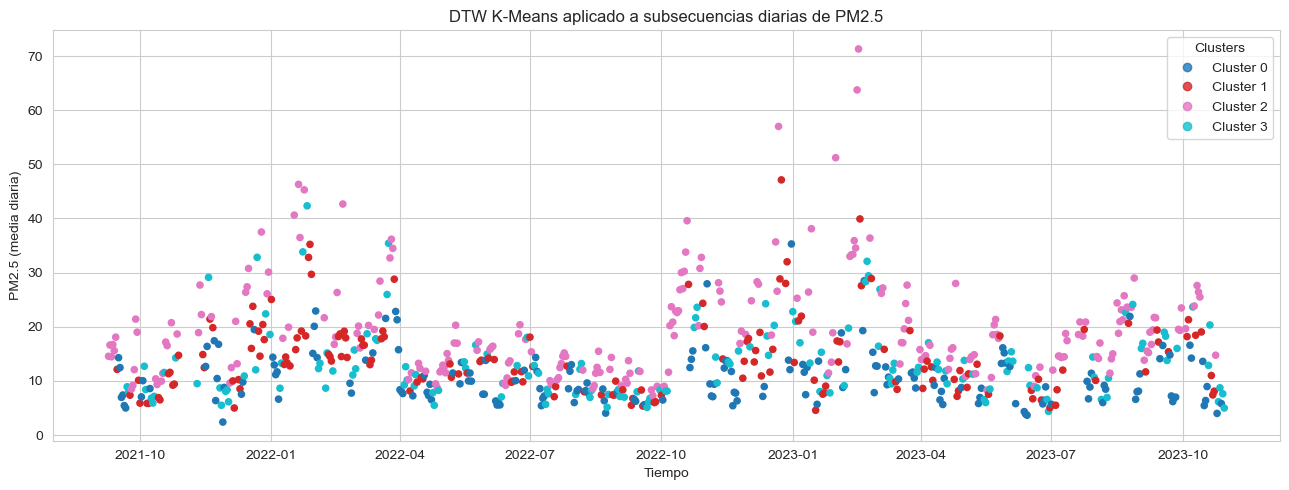

In [40]:
# Resampleo a diario para mejorara la eficacia computacional
df_daily = df['PM2.5'].resample('D').mean().dropna()

# 2) Construir subsecuencias de 7 días
window_size = 7
subseq = []
for i in range(len(df_daily) - window_size + 1):
    subseq.append(df_daily.iloc[i:i+window_size].values)
subseq = np.array(subseq)

# Escalado
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
subseq_scaled = TimeSeriesScalerMeanVariance().fit_transform(subseq)


from tslearn.clustering import TimeSeriesKMeans

k = 4
dtw_kmeans = TimeSeriesKMeans(
    n_clusters=k,
    metric="dtw",
    max_iter=10,
    n_init=2,
    random_state=42,
    metric_params={"sakoe_chiba_radius": 1},  # restricción DTW
    n_jobs=-1
)

labels = dtw_kmeans.fit_predict(subseq_scaled)


print("Distribución de clusters:", np.unique(labels, return_counts=True))

# Mostrar la primera observación que cae en cada clúster
lista=[]
for i in range(len(labels)):
    if len(lista) < k:
        if labels[i] not in lista:
            lista.append(labels[i])
            print(f"La observación {i+1} pertenece al cluster número {labels[i]}")

# Se asigna cada clúster al último instante de su ventana
time_index = df_daily.index[window_size - 1:]
values = df_daily.iloc[window_size - 1:]

plt.figure(figsize=(13, 5))

scatter = plt.scatter(
    time_index,
    values,
    c=labels,
    cmap="tab10",
    s=20
)

plt.title("DTW K-Means aplicado a subsecuencias diarias de PM2.5")
plt.xlabel("Tiempo")
plt.ylabel("PM2.5 (media diaria)")

handles, _ = scatter.legend_elements(prop="colors", alpha=0.8)
plt.legend(handles, [f"Cluster {i}" for i in range(k)], title="Clusters")

plt.tight_layout()
plt.show()


**<u>Interpretación resultados</u>.-**

El modelo DTW ha dividido el conjunto de datos en **4 clústeres distintos**. Las etiquetas obtenidas muestran que cada subsecuencia ha sido asignada a uno de los cuatro patrones temporales detectados. A modo de ejemplo, se enumeran las primeras observaciones que se incluyen en cada clúster: la observación 1 pertenece al clúster 2, la observación 7 al clúster 1, y así sucesivamente hasta cubrir todos los cluster.

El resumen de etiquetas muestra la distribución total de subsecuencias por clúster:

Clúster 0: 182 subsecuencias

Clúster 1: 165 subsecuencias

Clúster 2: 237 subsecuencias

Clúster 3: 152 subsecuencias

No se observa que algunos clústeres son mucho más numerosos, lo que sugiere que no hay ciertos patrones semanales del nivel de particulas PM2.5 que sean n muy frecuentes tras el resampleo de los datos.

Además a simple vista no se ve un patrón entre los clusters como se podía intuir en los casos de serie completa.

Dado que la métrica DTW no induce una noción euclídea de varianza, el método del codo clásico no es directamente aplicable. No obstante, se ha utilizado un análogo basado en el coste DTW intra-cluster proporcionado por el algoritmo TimeSeriesKMeans, complementado con el análisis del índice silhouette calculado a partir de distancias DTW.

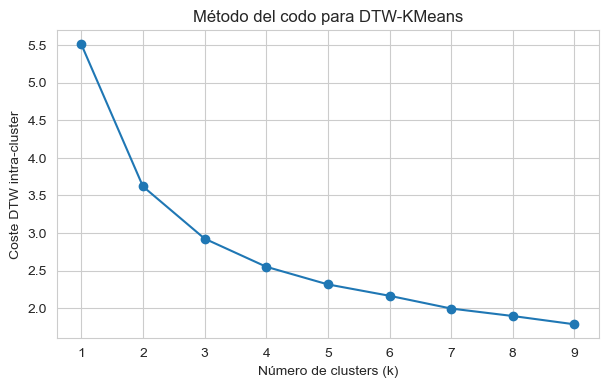

Diferencias marginales (caída de la función objetivo):

k =  2 | K-Means = 1.8923 
k =  3 | K-Means = 0.6948 
k =  4 | K-Means = 0.3744 
k =  5 | K-Means = 0.2350 
k =  6 | K-Means = 0.1514 
k =  7 | K-Means = 0.1699 
k =  8 | K-Means = 0.0993 
k =  9 | K-Means = 0.1104 

 Número óptimo de clusters según el método del codo:

K-Means k = 2 (1.8923)


In [50]:
from tslearn.clustering import TimeSeriesKMeans
import numpy as np

K_range = range(1, 10)
dtw_costs = []

for k in K_range:
    model = TimeSeriesKMeans(
        n_clusters=k,
        metric="dtw",
        max_iter=10,
        n_init=2,
        random_state=42,
        metric_params={"sakoe_chiba_radius": 1},
        n_jobs=-1
    ) 
    model.fit(subseq_scaled)
    dtw_costs.append(model.inertia_)


plt.figure(figsize=(7,4))
plt.plot(K_range, dtw_costs, marker="o")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Coste DTW intra-cluster")
plt.title("Método del codo para DTW-KMeans")
plt.grid(True)
plt.show()

k_vals = list(K_range)
delta_kmeans=[]

for i in range(1, len(k_vals)):
    delta_kmeans.append(dtw_costs[i-1] - dtw_costs[i])
    
    
print("Diferencias marginales (caída de la función objetivo):\n")

for i, k in enumerate(k_vals[1:]):
    print(
        f"k = {k:2d} | "
        f"K-Means = {delta_kmeans[i]:.4f} "
    )

# Máxima caída y k asociado
k_dtw = k_vals[np.argmax(delta_kmeans)]


print("\n Número óptimo de clusters según el método del codo:\n")
print(f"K-Means k = {k_dtw+1} ({max(delta_kmeans):.4f})")



**<u>Interpretación resultados</u>.-**  

El análisis del **método del codo** solo se ha aplicado a **DTW** ya que posee una estructura distinta ya que para poder ejecutarlo ha sido necesario reducir la dimensión realizando un resampleo a formato diario.

Como se observa la **caída drástica de la función objetivo se produce al pasar de $k=1$ a $k=2$ ($1.89$)**. Esta primera reducción concentra la mayor parte de la ganancia explicativa, lo que indica que separar la serie en **dos grandes grupos** supone el mayor incremento en homogeneidad interna. A partir de ese punto, las reducciones adicionales de la variabilidad son progresivamente menores, lo que sugiere una clara **pérdida de eficiencia marginal** al aumentar el número de clústeres.

3. (Opcional) **Implementar** un ejemplo LSTM con más lags/features.  

Las redes LSTM (Long Short-Term Memory) son un tipo de red neuronal recurrente diseñada específicamente para trabajar con datos secuenciales, como son las series temporales. Su principal característica es que están construidas para recordar información durante largos periodos de tiempo, algo que las RNN tradicionales no consiguen debido al problema del desvanecimiento del gradiente. Para evitarlo, las LSTM incorporan una estructura interna basada en un sistema de memoria controlada por cuatro componentes que regulan la entrada, el tratamiento y la salida de información. Gracias a esta arquitectura, son capaces de capturar dependencias no lineales y relaciones de largo alcance entre observaciones pasadas y futuras ademas de patrones temporales complejos.

El funcionamiento de una LSTM como se ha mencionada funciona con cuatro componentes. En primer lugar, Input Gate: la puerta de entrada decide qué información nueva se almacena en la memoria y de qué forma, la segunda sería **Forget Gate (puerta del olvido)** determina qué información debe permanecer en una celda y cuál debe ser eliminada permitiendo que la red ignore información que ya no es relevante, la tercera **Output Gate (la puerta de salida)** determina cómo se deben emitir los valores de una celda. La decisión se basa en el estado actual y en la información de entrada correspondiente y la cuarta y última sería **Cell State (estado de la celda)** este componente sigue una lógica de conexión propia que regula cómo interactúan los otros componentes y cómo se gestionan los flujos de información y los procesos de almacenamiento.

De forma muy resumida, el flujo que realiza una LSTM al trabajar con una serie temporal es el siguiente: (1) recibe el valor actual de la secuencia y el estado previo; (2) evalúa qué información pasada debe olvidarse; (3) calcula qué información nueva debe almacenarse; (4) actualiza su memoria combinando pasado relevante y presente útil; y (5) genera la salida que se utilizará tanto para la predicción como para el siguiente paso temporal. 

Una vez explicado el funcionamiento general, en el contexto de predicción de series temporales, una LSTM transforma primero los datos en formato supervisado mediante retardos (lags), de modo que las observaciones pasadas sirven como entrada y los valores futuros como objetivo. A partir de ahí, aprende patrones temporales que pueden incluir estacionalidades, ciclos, tendencias no lineales o efectos retardados que resultan difíciles de capturar con modelos como ARIMA o VAR. 

c:\Users\ergio\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
MSE (escala normalizada): 0.0008639627730832857
MSE (escala real): 22.117446464733803


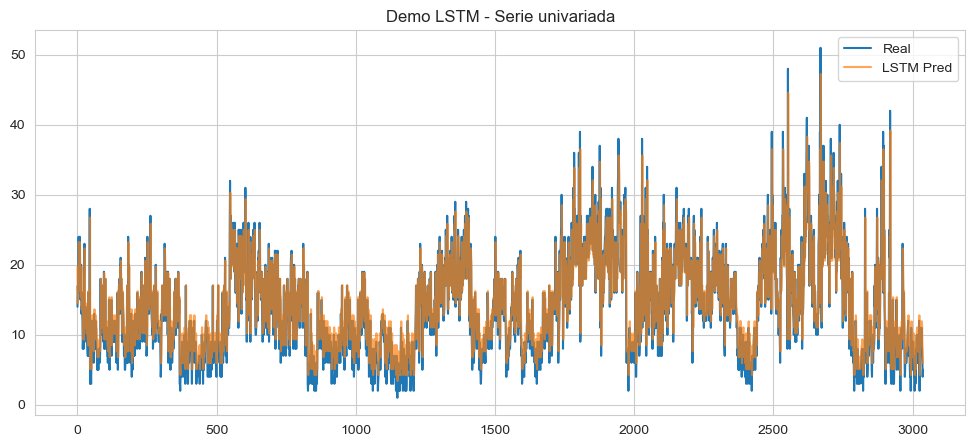

In [42]:
# Normalización
from sklearn.preprocessing import MinMaxScaler

# Scaler de X (lag1)
scaler_X = MinMaxScaler()
X_all = scaler_X.fit_transform(df_feat[["lag1"]])

# Scaler de Y (PM2.5)
scaler_Y = MinMaxScaler()
y_all = scaler_Y.fit_transform(df_feat[["PM2.5"]]).flatten()

# Dar forma para LSTM
X_all = X_all.reshape(X_all.shape[0], 1, 1)

# Split train/test
train_size = int(0.8 * len(X_all))
X_train_lstm, X_test_lstm = X_all[:train_size], X_all[train_size:]
y_train_lstm, y_test_lstm = y_all[:train_size], y_all[train_size:]

# Modelo LSTM
model = Sequential()
model.add(LSTM(16, input_shape=(1,1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

history = model.fit(
    X_train_lstm, y_train_lstm,
    epochs=10, batch_size=8,
    validation_split=0.1, verbose=0
)

# Predicciones
y_pred_lstm = model.predict(X_test_lstm)

# Invertimos la escala para ver valores reales
# y_test_lstm -> shape: (num_samples,)
# y_pred_lstm -> shape: (num_samples, 1)
y_test_rescaled = scaler_Y.inverse_transform(y_test_lstm.reshape(-1,1)).flatten()
y_pred_rescaled = scaler_Y.inverse_transform(y_pred_lstm).flatten()

mse_scaled = mean_squared_error(y_test_lstm, y_pred_lstm)   # escala normalizada
mse_real = mean_squared_error(y_test_rescaled, y_pred_rescaled)  # escala original

print("MSE (escala normalizada):", mse_scaled)
print("MSE (escala real):", mse_real)

plt.figure(figsize=(12,5))
plt.plot(y_test_rescaled, label="Real")
plt.plot(y_pred_rescaled, label="LSTM Pred", alpha=0.7)
plt.title("Demo LSTM - Serie univariada")
plt.legend()
plt.show()


**<u>Interpretación resultados</u>.-** 
La comparación entre la serie real y la predicción generada por la LSTM muestra que el modelo es capaz de **seguir razonablemente bien la forma general de la serie**. La red ha aprendido una relación temporal básica entre el valor actual del PM2.5 y su rezago, aunque existen desviaciones visibles en los momentos en los que la serie presenta **picos abruptos** o **cambios muy rápidos**. Estos errores son típicos en modelos univariados (con un único *lag*) ya que la información disponible para anticipar movimientos bruscos es limitada.

Respecto a los errores, el **MSE en escala normalizada** ($0.00086$) indica que dentro del intervalo $[0,1]$ las predicciones son muy precisas, lo cual es esperable después de escalar los datos. En cambio, el **MSE en escala real** ($21.91$) refleja el error en unidades de PM2.5. Este valor, aunque moderado frente a la variabilidad total de la serie (que alcanza valores superiores a 40-50), sugiere que el modelo captura adecuadamente el comportamiento central de la serie, pero sigue teniendo dificultades para ajustar correctamente los extremos y oscilaciones rápidas pese a ser el mejor MSE de los modelos realizados hasta ahora.

# Practica 7

No hay una sección que sea tarea por lo que se realizará todos los pasos que se hacen el dicha practica

In [43]:
# Sección 0: Importaciones

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Para Granger Causality
from statsmodels.tsa.stattools import grangercausalitytests
# Para VAR
from statsmodels.tsa.api import VAR

%matplotlib inline
sns.set_style('whitegrid')

print("Entorno preparado para causalidad.")


Entorno preparado para causalidad.


Dado que la serie posee una frecuencia horaria, se explorará la posible relación causal entre PM10 y PM2.5 en el corto plazo. Para ello, se empleó un máximo de 7 retardos (equivalente a 7 horas), lo cual permite capturar dependencias rápidas entre contaminantes producidos con pocos minutos de desfase, tal y como es habitual en episodios de polución urbana. No obstante, este enfoque no captura ciclos diarios (24 h) o semanales (168 h), que podrían requerir pruebas adicionales con lags mayores.

En cada número de retardos se proporcionan cuatro contrastes diferentes, pero todos evalúan la misma hipótesis:

- **H0:** Los coeficientes de los retardos de PM10 son cero por lo que PM10 *no* Granger-causa PM2.5.  
- **H1:** Al menos un coeficiente es distinto de cero entonces PM10 *sí* Granger-causa PM2.5.

los cuatros test que realizan son los siguinetes:

**1. SSR based F-test**
Compara el modelo restringido (sin retardos de PM10) con el modelo completo (incluyéndolos) mediante la variación explicada (SSR). Si el F es alto y significativo, los retardos de PM10 mejoran el modelo.  

**2. SSR based $\chi^2$ test (Wald test)**
Reformula el contraste como un test $\chi^2$ sobre las restricciones lineales.  

**3. Likelihood Ratio (LR) test**
Compara la verosimilitud del modelo con y sin retardos de PM10.  Si el **LR elevado y p < 0.0005**, indica que incluir PM10 mejora significativamente el ajuste.

**4. Parameter F-test**
Es un F-test directo sobre los coeficientes, equivalente al primero, aplicado a los parámetros estimados.  

In [44]:
max_lag = 7

# Granger tests: La función requiere un array con la forma [Y, X]
# Por convención, el primer col es la variable "dependiente".
# Queremos ver si 'PM10' Granger causa 'PM2.5'.

data_for_test = df[['PM2.5', 'PM10']].dropna()  # [Y=PM2.5, X=PM10]
grangercausalitytests(data_for_test, maxlag=max_lag, addconst=True, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=307.7244, p=0.0000  , df_denom=15188, df_num=1
ssr based chi2 test:   chi2=307.7852, p=0.0000  , df=1
likelihood ratio test: chi2=304.7086, p=0.0000  , df=1
parameter F test:         F=307.7244, p=0.0000  , df_denom=15188, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=70.8807 , p=0.0000  , df_denom=15185, df_num=2
ssr based chi2 test:   chi2=141.8081, p=0.0000  , df=2
likelihood ratio test: chi2=141.1503, p=0.0000  , df=2
parameter F test:         F=70.8807 , p=0.0000  , df_denom=15185, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=40.3345 , p=0.0000  , df_denom=15182, df_num=3
ssr based chi2 test:   chi2=121.0593, p=0.0000  , df=3
likelihood ratio test: chi2=120.5794, p=0.0000  , df=3
parameter F test:         F=40.3345 , p=0.0000  , df_denom=15182, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=34.5301 

c:\Users\ergio\anaconda3\envs\tf_env\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


{np.int64(1): ({'ssr_ftest': (np.float64(307.7243741191564),
    np.float64(3.2154217430277255e-68),
    np.float64(15188.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(307.78515717962233),
    np.float64(6.633134265960698e-69),
    np.int64(1)),
   'lrtest': (np.float64(304.7086229426641),
    np.float64(3.1041818400167243e-68),
    np.int64(1)),
   'params_ftest': (np.float64(307.7243741191567),
    np.float64(3.2154217430277255e-68),
    np.float64(15188.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(70.8807085539691),
    np.float64(2.2892911055416607e-31),
    np.float64(15185.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(141.8080952169629),
    np.float64(1.6097683301631197e-31),
    np.int64(2)),
   'lrtest': (np.float64(141.15025291920756),
    np.float64(2.2367220492233976e-31),
    np.int64(2)),
   'params_ftest': (np.float64(70.88070855396829),
    np.float64(2.2892911055435476e-31),
    np.float64(15185.0),
    2.0)},
   arr

**<u>Interpretación resultados</u>.-**

A partir de los tests de causalidad de Granger aplicados para evaluar si **PM10 Granger-causa PM2.5**, se observan resultados que en todos los retardos evaluados (1 a 7). En todos ellos, el valor-p asociado a los distintos contrastes es **p < 0.001**, lo que implica que **rechazamos la hipótesis nula** de que "PM10 no ayuda a predecir PM2.5". Por tanto, existe evidencia estadísticamente significativa de que **PM10 tiene capacidad predictiva sobre PM2.5**. La magnitud de los estadísticos disminuye con el número de retardos, lo cual es coherente con la semantica del dato, pero la significación se mantiene incluso con 7 lags, lo que muestra una relación dinámica sólida entre ambas series.

In [45]:
# [Y=PM2.5, X=PM10]
data_for_test_inv = df[['PM2.5', 'PM10']].dropna()
grangercausalitytests(data_for_test_inv, maxlag=max_lag, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=307.7244, p=0.0000  , df_denom=15188, df_num=1
ssr based chi2 test:   chi2=307.7852, p=0.0000  , df=1
likelihood ratio test: chi2=304.7086, p=0.0000  , df=1
parameter F test:         F=307.7244, p=0.0000  , df_denom=15188, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=70.8807 , p=0.0000  , df_denom=15185, df_num=2
ssr based chi2 test:   chi2=141.8081, p=0.0000  , df=2
likelihood ratio test: chi2=141.1503, p=0.0000  , df=2
parameter F test:         F=70.8807 , p=0.0000  , df_denom=15185, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=40.3345 , p=0.0000  , df_denom=15182, df_num=3
ssr based chi2 test:   chi2=121.0593, p=0.0000  , df=3
likelihood ratio test: chi2=120.5794, p=0.0000  , df=3
parameter F test:         F=40.3345 , p=0.0000  , df_denom=15182, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=34.5301 

c:\Users\ergio\anaconda3\envs\tf_env\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


likelihood ratio test: chi2=159.0691, p=0.0000  , df=7
parameter F test:         F=22.8210 , p=0.0000  , df_denom=15170, df_num=7


{np.int64(1): ({'ssr_ftest': (np.float64(307.7243741191564),
    np.float64(3.2154217430277255e-68),
    np.float64(15188.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(307.78515717962233),
    np.float64(6.633134265960698e-69),
    np.int64(1)),
   'lrtest': (np.float64(304.7086229426641),
    np.float64(3.1041818400167243e-68),
    np.int64(1)),
   'params_ftest': (np.float64(307.7243741191567),
    np.float64(3.2154217430277255e-68),
    np.float64(15188.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(70.8807085539691),
    np.float64(2.2892911055416607e-31),
    np.float64(15185.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(141.8080952169629),
    np.float64(1.6097683301631197e-31),
    np.int64(2)),
   'lrtest': (np.float64(141.15025291920756),
    np.float64(2.2367220492233976e-31),
    np.int64(2)),
   'params_ftest': (np.float64(70.88070855396829),
    np.float64(2.2892911055435476e-31),
    np.float64(15185.0),
    2.0)},
   arr

**<u>Interpretación resultados</u>.-**
Todos los tests indican que existe una **relación causal de Granger clara y estadísticamente significativa** desde **PM10 hacia PM2.5 y viceversa**. Los retardos más cortos (1-3 horas) son los más explicativos, pero incluso con 7 horas la relación sigue siendo robusta. Esto indica que los niveles de PM10 contienen información relevante para predecir la evolución futura de PM2.5 y viceversa, lo cual es coherente con la dinámica conjunta de partículas contaminantes en ambientes urbanos.

El modelo **VAR (Vector Autoregressive Model)** es una extensión multivariante de los modelos autorregresivos clásicos. Mientras que un modelo AR predice una variable usando sus propios valores pasados, un modelo VAR **predice simultáneamente varias variables**, permitiendo que cada una dependa no solo de sus propios retardos sino también de los **retardos de las demás**. Esto convierte al VAR en una herramienta fundamental para estudiar sistemas donde las series temporales están interrelacionadas.

Para dos variables, por ejemplo PM2.5 y PM10, un VAR(p) tiene la forma:


\begin{aligned}
PM2.5_t &= a_1 + b_{11}^{(1)} PM2.5_{t-1} + b_{12}^{(1)} PM10_{t-1} + \cdots + b_{11}^{(p)} PM2.5_{t-p} + b_{12}^{(p)} PM10_{t-p} + \varepsilon_{1,t} \\
PM10_t &= a_2 + b_{21}^{(1)} PM2.5_{t-1} + b_{22}^{(1)} PM10_{t-1} + \cdots + b_{21}^{(p)} PM2.5_{t-p} + b_{22}^{(p)} PM10_{t-p} + \varepsilon_{2,t}
\end{aligned}


Cada ecuación se estima mediante regresión múltiple, y todas se ajustan de manera conjunta.  
Los términos $\varepsilon_{t}$ son ruido blanco correlacionadas, lo que permite capturar shocks comunes entre las variables.

En tu caso, como las series están registradas de forma horaria, es especialmente importante diferenciar si presentan tendencias o estacionalidad para garantizar la validez estadística del VAR.

In [46]:
model_var = VAR(df[['PM2.5', 'PM10']].dropna())
results_var = model_var.fit(maxlags=7, ic='aic')
print(results_var.summary())

# Ver información de las ecuaciones
print(results_var.test_causality('PM2.5', ['PM10'], kind='f'))
print(results_var.test_causality('PM10', ['PM2.5'], kind='f'))

c:\Users\ergio\anaconda3\envs\tf_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 18, Dec, 2025
Time:                     21:44:43
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    7.94774
Nobs:                     15185.0    HQIC:                   7.93766
Log likelihood:          -103292.    FPE:                    2786.85
AIC:                      7.93267    Det(Omega_mle):         2781.35
--------------------------------------------------------------------
Results for equation PM2.5
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            1.115418         0.081176           13.741           0.000
L1.PM2.5         0.548307         0.008316           65.930           0.000
L1.PM10          0.036693         0.003517           10.434           0.000
L2.P

**<u>Interpretación resultados</u>.-**

Se ha estimado un **VAR con 2 variables (PM2.5 y PM10)** y con un máximo de **7 retardos**, donde el propio modelo ha seleccionado el orden óptimo usando el **AIC**:

- **AIC = 7.93**, que indica la calidad relativa del ajuste (menor es mejor), siendo el modelo con el valor más pequeño.
- **Nobs = 15185**, por lo que el modelo se ha ajustado con un número muy grande de observaciones, lo que mejora la estabilidad.
- **Det(Omega)** alrededor de 2781, lo cual es el determinante de la matriz de covarianzas de los errores.

La ecuación para PM2.5 sería la siguiente:
$$PM2.5_t = \text{const} +\sum_{k=1}^7 \alpha_k \, PM2.5_{t-k} +\sum_{k=1}^7 \beta_k \, PM10_{t-k} + \varepsilon_{1,t}$$

**La mayoría de los retardos de PM2.5 son muy significativos** ($p \simeq  0.000$), esto indica que **PM2.5 depende fuertemente de su propia dinámica pasada**, lo cual es habitual en series de contaminación atmosférica.

**Los retardos de PM10 tienen una contribución más débil:**  
  - L1.PM10: coef = 0.0367, p < 0.001  por lo que es significativo  
  - L4.PM10: coef = −0.0137, p = 0.001  por lo que es significativo  
  - Otros retardos no son significativos (p > 0.5 en algunos casos (L3.PM10  o L2.PM10))

Esto implica que **PM10 influye sobre PM2.5**, pero la magnitud del efecto es mucho menor que la autocorrelación propia de PM2.5.

